# Event-Studies with a Continuous Treatment

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Introdução
* Parâmetros Causais de Interesse
* Parâmetros do Tipo Estudo de Evento
* Identificação dos Parâmetros de Estudo de Evento
* Aplicação em Python


## Referências

* Brantly Callaway, Andrew Goodman-Bacon, and Pedro H. C. Sant’Anna. 2024. "Event-Studies with a Continuous Treatment." American Economic Review, PAPERS AND PROCEEDINGS, May, 114(5): 1-8.
* https://github.com/Daniel-Uhr/Data/blob/main/CGBS_AEAPP.pdf 




**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---





<div style="text-align:center;">
    <img src="images\Callawayetal2024.png"  alt="Imagem" style="width: 700px;"/>
</div>


<div style="text-align:center;">
    <img src="images\Callawayetal2024_2.png"  alt="Imagem" style="width: 700px;"/>
</div>


**Resumo**: Este artigo expande os resultados de identificação e as ferramentas de estimação para desenhos de diferenças em diferenças contínuas apresentados por Callaway, Goodman-Bacon e Sant'Anna (2024), discutindo **estratégias de agregação para estudos de eventos com tratamentos contínuos. As estimativas desses desenhos contínuos são funções da variável de dosagem/intensidade do tratamento.** Gráficos não paramétricos dessas funções revelam heterogeneidade entre as dosagens, mas não ao longo do tempo. Por outro lado, gráficos do tipo estudo de eventos de parâmetros agregados mostram o oposto. Descrevemos como a agregação parcial entre dosagens de tratamento e tempo de evento pode resultar em figuras legíveis e detalhadas que refletem a evolução dos efeitos causais ao longo do tempo, possivelmente em diferentes partes da distribuição das dosagens de tratamento. 



Essa aula é, praticamente, uma tradução do artigo de Callaway, Goodman-Bacon e Sant'Anna (2024), e tradução dos resultados apresentados no artigo de R para Python.

### Introdução

Nessa aula vamos aprender sobre o artigo "Event-Studies with a Continuous Treatment" de Callaway, Goodman-Bacon e Sant'Anna (2024). O artigo discute a estimação de parâmetros causais em estudos de eventos com tratamento contínuo. Vamos tentar abordar os principais pontos do artigo e aplicar os conceitos em Python.

Um pesquisador pode analisar um desenho de Diferenças em Diferenças (DiD) de dois grupos e dois períodos sem precisar fazer muitas escolhas. Supondo que o tratamento não afete os resultados antes de sua iniciação, o efeito médio do tratamento sobre os tratados é identificado sob uma suposição de tendências paralelas pela diferença entre as mudanças médias dos resultados entre os grupos: um parâmetro, uma suposição de tendências paralelas e um estimador.

No entanto, um desenho DiD mais complexo exige que os pesquisadores façam mais decisões. Suponha que o pesquisador precisa usar métodos DiD para estudar um tratamento que começa em diferentes momentos (escalonado) e afeta as unidades em diferentes graus (intensidade do tratamento). O artigo de discute maneiras transparentes de agregar o grande conjunto de parâmetros causais que surgem nesse contexto, transmitindo a heterogeneidade por tempo de evento e entre doses, e mostramos como essas escolhas podem simplificar a estimação e a inferência. Em contraste com os parâmetros de especificações lineares comuns com TWFE,os parâmetros não sofrem com problemas de ponderação negativa/não transparente.

### Parâmetros Causais de Interesse
Considere um conjunto de dados em painel com $N$ unidades indexadas por $i$, e $T$ períodos de tempo indexados por $t$. Denotamos o período em que a unidade $i$ é tratada pela primeira vez por $G_i \in G = \{2, \ldots, T, \infty\}$, onde $G_i = \infty$ significa que uma unidade não é tratada até $T$ (“nunca tratada”). Como focamos em configurações escalonadas, $G_i$ pode ser interpretado como o “grupo de tempo de tratamento”. Deixe $D_i \in D \subseteq [0, d_H]$, onde $d_H < \infty$, representar a “dose” (ou intensidade) do tratamento que a unidade $i$ recebeu quando foi tratada pela primeira vez. Interpretamos $D_i$ como o “grupo de dose”.

Adotamos o framework de resultado potencial e escrevemos $Y_{i,t}(g, d)$ como o resultado potencial da unidade $i$ no tempo $t$ se essa unidade fosse tratada pela primeira vez no período $g$, com dose $d$. Para unidades que permanecem não tratadas até o último período de tempo dos dados disponíveis, escrevemos $Y_{i,t}(0) = Y_{i,t}(\infty, 0)$. Essa notação define os efeitos médios do tratamento específicos para grupo-tempo-dose:

$$
ATT(g, t, d) = E[Y_t(g, d) - Y_t(0) \mid G = g, D = d].
$$

$ATT(g, t, d)$ é o efeito médio do tratamento no período $t$ de (i) ser tratado no período $g$ e (ii) experimentar a dose $d$ versus dose zero, entre aqueles no grupo de tempo $g$ que receberam a dose $d$. Os parâmetros $ATT(g, t, d)$ descrevem o que algum tratamento realmente alcançou. Eles incorporam muitos tipos de heterogeneidade que os pesquisadores frequentemente desejam relatar e interpretar. Para um dado $g$ e $t$, os efeitos médios em diferentes doses descrevem a “função dose-resposta” do grupo $g$. Para um dado $d$ e $g$, as diferenças nos efeitos causais médios ao longo de $t$ representam a dinâmica do efeito do tratamento. Finalmente, para um dado $d$ e $t$, diferentes efeitos médios por $g$ capturam uma combinação de dinâmica e diferenças no efeito de ser tratado em um determinado momento.

Com tratamentos contínuos, outra classe de parâmetros causais que pode ser de interesse são os parâmetros de resposta causal média, definidos como:

$$
ACR(g, t, d) = \frac{\partial E[Y_t(g, \tilde{d}) \mid G = g]}{\partial \tilde{d}} \Bigg|_{\tilde{d} = d}.
$$

$ACR(g, t, d)$ é a resposta causal média a uma mudança marginal na dose em $d$ para todas as unidades no grupo de tempo $g$. **Parâmetros $ACR$ respondem a perguntas causais sobre qual nível de tratamento importa mais ou menos**. Esse parâmetro de inclinação também é uma função de $g$, $t$ e $d$, e pode variar nessas dimensões de maneiras significativas.

Em configurações de DiD escalonadas com tratamentos contínuos, pode não ser prático estimar uma função do tipo dose-resposta para cada $t$ e $g$. Assim, os pesquisadores podem querer agregar esses “blocos de construção” por tempo desde o tratamento (tempo de evento; $e = t - g$) e/ou entre doses. Aqui, focamos em resumir os $ATT(g, t, d)$ ao longo de ambas as margens e discutimos como essas escolhas de agregação moldam a estimação.

### Parâmetros do Tipo Estudo de Evento

Começamos discutindo as **agregações de estudo de evento que fazem a média sobre as dosagens de tratamento**. Para um dado grupo $g$ e tempo $t$, seja $ATT_o(g, t) = E[ATT(g, t, D) \mid G = g, D > 0]$, que é o efeito médio do tratamento para aquele grupo em um determinado ponto no tempo. Em seguida, definimos:

$$
ATT_{es}(e) = E[ATT_o(G, G + e) \mid G + e \in [2, T], D > 0]
$$

que denota o **efeito médio do tratamento entre aqueles que foram expostos a qualquer tratamento** por exatamente $e$ períodos, condicional a serem observados participando do tratamento por aquele número de períodos ($G + e \in [2, T]$) e sendo tratados em algum momento ($D > 0$). Quando $D$ é binário, $ATT_{es}(e)$ se reduz ao coeficiente do estudo de evento considerado por Callaway e Sant'Anna (2021).

Os parâmetros acima agregam completamente as doses e, portanto, não descrevem a dinâmica dos efeitos do tratamento para grupos de “alta dose” ou “baixa dose”, por exemplo. Para abordar essas questões, **podemos agregar parcialmente as doses em cada grupo e período de tempo para formar os parâmetros de estudo de evento “conscientes da dose”**:

$$
ATT_{es_{d1,d2}}(e) = E[ATT_o(G, G + e) \mid d1 \leq D \leq d2, G + e \in [2, T]],
$$

onde $ATT_o(g, g + e) = E[ATT(g, t, D) \mid G = g, d1 \leq D \leq d2]$, e $0 < d1 \leq d2$ são limites dentro do suporte de $D$. 

Escolhendo diferentes intervalos, podemos avaliar como as dinâmicas do efeito médio do tratamento variam entre grupos de dosagem. Por exemplo, **poderíamos definir $d1$ e $d2$ para dividir as unidades tratadas em aquelas com doses acima ou abaixo da mediana**. Naturalmente, pode-se *considerar partições de dose mais refinadas, mas recomendamos prestar atenção ao tamanho efetivo da amostra em cada partição escolhida*.

Uma característica do $ATT_{es_{d1,d2}}(e)$ é que ele agrega entre várias dosagens de tratamento. Em algumas aplicações, no entanto, os pesquisadores podem querer relatar heterogeneidade detalhada com respeito a $d$. Agregar sobre alguns tempos de evento pode facilitar o relato das funções estimadas de dose-resposta. Para formalizar essa ideia, sejam $e1$ e $e2$ dois tempos de evento pós-tratamento tais que $0 \leq e1 \leq e2$ e

$$
ATT_{es_{e1,e2}}(d) = \frac{1}{e2 - e1 + 1} \sum_{e=e1}^{e2} E[ATT(G, G + e, d) \mid G + e2 \in [2, T], D = d]
$$

seja o efeito médio do tratamento de receber a dose $d$, entre todas as unidades que foram tratadas por pelo menos $e2$ períodos, calculado como a média ao longo dos tempos de evento $e1$ até $e2$. Quando $e2 = e1 = e$, $ATT_{es_{e1,e2}}(d)$ fornece uma função dose-resposta para todas as unidades que foram tratadas por exatamente $e$ períodos. Quando $e2 > e1$, no entanto, $ATT_{es_{e1,e2}}(d)$ faz a média dessas curvas ao longo do tempo de evento e pode ser usado para resumir respostas de dose em termos de efeitos de “curto prazo” (ex.: $e1 = 0, e2 = 2$) e de “longo prazo” (ex.: $e1 = 3, e2 = 4$). Ao construir essas curvas de resposta à dose com média sobre os tempos de evento, impomos que os dados estejam balanceados no tempo de evento dentro da janela de $e1$ a $e2$ ($G + e2 \in [2, T]$), para que mudanças de composição não sejam uma preocupação, mas é possível relaxar essa restrição.

**Hipóteses de Identificação**

Seja $D_{+} = D \setminus \{0\}$ o subconjunto positivo do suporte de $D$. Seja $\Delta Y_t = Y_t - Y_{t-1}$ e defina $W_t = D1\{t \geq G\}$.

* **Hipótese 1:** [Dados em Painel] 
  * $\{Y_{i,1}, \ldots, Y_{i,T}, D_i, G_i\}_{i=1}^{n}$, independentes e identicamente distribuídos.

* **Hipótese 2:** (i) $D^+ = [d_L, d_U]$ com $0 < d_L < d_U < \infty$, (ii) $P(D = 0) > 0$ e $dF_{D|G}(d | g) > 0$ para todos $(g, d) \in (G \setminus \{\infty\}) \times D^+$, (iii) Para todo $g \in (G \setminus \{\infty\})$ e $t = 2, \ldots, T$, $E[\Delta Y_t | G = g, D = d]$ é continuamente diferenciável em $d$ sobre $D^+$.
  * A Suposição 2 afirma que temos um conjunto de unidades que nunca são tratadas e que o tratamento é contínuo; se não houver unidades nunca tratadas, podemos restringir a análise aos períodos $t = 1, \ldots, \bar{G} - 1$, onde $\bar{G} = \max\{G_i : G_i < \infty\}$ é o tempo do último grupo tratado.

* **Hipótese 3:** [Não-antecipação, e tratamento escalonado] 
  * (i) Para todo $g \in G$ e $t = 1, \ldots, T$ com $t < g$, $Y_{i,t}(g, d) = Y_{i,t}(0)$ a.s., 
  * (ii) $W_{i,1} = 0$ a.s. e para $t = 2, \ldots, T$, $W_{i,t-1} = d$ implica que $W_{i,t} = d$ a.s.

* **Hipótese 4:** [Tendências Paralelas] na ausência de tratamento, a evolução média dos resultados potenciais não tratados é a mesma entre grupos de tempo-dosagem.
  * Para todos $(g, g') \in G \times G$, $t = 2, \ldots, T$, e $(d, d') \in D \times D$, $E[\Delta Y_t(0) | G = g, D = d] = E[\Delta Y_t(0) | G = g', D = d']$.



**Resumo**

O método apresentado no artigo aborda o uso de Diferenças em Diferenças (DiD) em contextos com tratamentos que:
* Ocorram em momentos diferentes (tratamento escalonado);
* Tenham intensidade contínua (dose do tratamento).

Os parâmetros de interesse incluem:
* $ATT(g, t, d)$: Average Treatment Effect on the Treated - que varia no tempo, dose e grupos;
* $ACR(g, t, d)$: Average Causal Response - que mede a resposta média a uma mudança marginal na dose.

O artigo propõe formas de agregar os parâmetros (por tempo desde o tratamento ou por faixas de dose), simplificando a análise e inferência.

A identificação é garantida sob hipóteses de tendências paralelas, não antecipação, e independência entre unidades.

**Conclusões**

Devido ao grande número de parâmetros "blocos de construção" em um design de Diferenças em Diferenças (DiD) escalonado e contínuo (por exemplo, $ATT(g, t, d)$), os pesquisadores primeiro precisam escolher uma forma de agregá-los. Essa escolha deve ser guiada pela questão de pesquisa. No exemplo aplicado pelos autores no artigo, o **interesse nos efeitos dinâmicos do fracking sugere agregações do tipo estudo de eventos** para categorias de prospectividade. O interesse na relação entre dotação de recursos naturais e economias locais sugere agregações do tipo dose-resposta em diferentes janelas temporais após o fracking.

Os autores sugerem que uma vez que os parâmetros resumo agregados tenham sido escolhidos, no entanto, muitas ferramentas simples de estimativa DiD estão disponíveis. Assim, na prática, escolhas cuidadosas sobre a agregação ajudam tanto na interpretação quanto na aplicação de métodos "novos" de DiD.

## Aplicação em Python

**Artigo: Bartik et al. (2019a)**

Bartik et al. (2019a) usam uma variável de tratamento escalonada e não binária para estudar os efeitos econômicos locais da fraturação hidráulica (fracking). O *fracking* é possível apenas em áreas com formações de xisto subterrâneas que podem ser fraturadas para liberar hidrocarbonetos. Os custos e rendimentos do *fracking*—“prospectividade” — dependem de fatores geológicos que variam continuamente entre áreas dentro de uma determinada formação de xisto. Modificamos ligeiramente o desenho de pesquisa DiD em Bartik et al. (2019a) explorando a variação no **momento da atividade de fracking** em diferentes formações de xisto de 2001 a 2014 ($G_i$, coletados manualmente pelos autores) e a variação contínua na pontuação de prospectividade entre condados ($D_i$, adquirida da Rystad Energy); ver Bartik et al. (2019b). Denominamos os condados com pontuação de prospectividade zero como “nunca tratados” e definimos $G_i = \infty$ para eles. Focamos no logaritmo do emprego total do condado como nosso principal resultado (outcome), e usamos as unidades ainda não tratadas como grupo de comparação em todas as estimativas abaixo.

A **Figura 1** apresenta os resultados para $ATT_{es}(e)$ usando dois conjuntos de $(d_1, d_2)$: 
* A **curva laranja** define $d_1 = 0.20$ e $d_2 = 3.95$, onde 0.20 e 3.95 são, respectivamente, a exposição mínima e mediana ao fracking entre os condados com exposição positiva. Chamamos esse grupo de “baixa dose”. 
* A **curva azul** define $d_1$ ligeiramente acima de 3.95 e $d_2 = 9.35$, onde o último é a exposição máxima ao fracking. Chamamos esse grupo de “alta dose”. 
 
As tendências pré-tratamento parecem paralelas para ambos os grupos por 11 anos antes do fracking, apoiando a suposição de tendências paralelas. Os condados de “baixa dose” têm efeitos de tratamento que não são estatisticamente diferentes de zero até três anos após o início do fracking, quando eles são cerca de 2%. Os condados de “alta dose”, por outro lado, apresentam efeitos médios maiores que crescem de 2% no ano após o fracking para 7% de emprego mais alto quatro anos depois.

<div style="text-align:center;">
    <img src="images\DDCT1.png"  alt="Imagem" style="width: 700px;"/>
</div>

A **Figura 2** apresenta os resultados para as curvas de resposta à dose com médias ao longo do tempo, $ATT_{es}(d)$: 
* A **curva laranja** define $e_1$ e $e_2$ para 0 e 2 (“curto prazo”) 
* A **curva azul** usa 3 e 4 (“longo prazo”). 

<div style="text-align:center;">
    <img src="images\DDCT3.png"  alt="Imagem" style="width: 700px;"/>
</div>

**Notas:**
Linhas sólidas denotam estimativas de $ATT_{es}(d)$ usando Callaway, Goodman-Bacon e Sant’Anna (2024). As áreas sombreadas são intervalos de confiança pontuais de 95%. A curva laranja (azul) define $e_1$ e $e_2$ para 0 e 2 (3 e 4).

**Figura 2. Curvas de Resposta à Dose Estimadas para Efeitos de Curto e Longo Prazo**

Esta figura ecoa as conclusões da Figura 1 de que os efeitos de curto prazo são menores do que os de longo prazo e que os condados com pontuações de prospectividade mais altas têm maiores efeitos no emprego provenientes do *fracking*. Essa agregação, no entanto, mostra onde na distribuição da prospectividade esses efeitos são maiores. Por exemplo, no longo prazo, os efeitos médios no emprego são igualmente grandes para todos os condados com pontuações acima de cerca de 4.


**Códigos para replicar os resultados do artigo em python**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from differences import ATTgt

In [2]:
# Carregar os dados
data_bcgk = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bcgk_replication.dta")

# Ordenar por 'i' e 't' (Estrutura de Painel de Dados)
data_bcgk.sort_values(['i', 't'], inplace=True)

In [3]:
# Criar uma tabela para contar observações por unidade e período (forma de verificar se todos os indivíduos têm o mesmo número de observações temporais)
contagem = data_bcgk.groupby('i')['t'].nunique()
contagem.value_counts()

t
26    405
Name: count, dtype: int64

Temos o painel de dados balanceado. Podemos começar a criar a variável com a medida da mediana da intensidade do tratamento, e a criação das variáveis de tratamento para a análise.

In [4]:
# Começar a manipulação de dados e criação das variáveis para análise

# Calcular a mediana das dosagens positivas
median_d = data_bcgk.loc[data_bcgk['d'] > 0, 'd'].median()

# Manipulação de dados usando pandas, retirar dados de 2015, criação de variáveis indicativas
data_bcgk = (
    data_bcgk[data_bcgk['t'] != 2015]
    .assign(
        d_above_treated_median=lambda df: (df['d'] > median_d).astype(int),
        d_below_treated_median=lambda df: ((df['d'] <= median_d) & (df['d'] > 0)).astype(int)
    )
    .dropna(subset=['y'])
    .assign(i=lambda df: df['i'].astype(int))
)
median_d

3.950000047683716

In [5]:
# Calcular os quantis de dose para evitar extrapolação
quantiles_d = np.quantile(data_bcgk[data_bcgk['d'] > 0]['d'], [0.05, 0.95])
min_d_pos = data_bcgk[data_bcgk['d'] > 0]['d'].min()
max_d_pos = data_bcgk[data_bcgk['d'] > 0]['d'].max()

# Exibir os resultados
print("Quantis de dose (5% e 95%):", quantiles_d)
print("Mínimo de doses positivas:", min_d_pos)
print("Máximo de doses positivas:", max_d_pos)

Quantis de dose (5% e 95%): [2.3499999  6.30999994]
Mínimo de doses positivas: 0.20000000298023224
Máximo de doses positivas: 9.34000015258789


In [6]:
# Criar subconjunto de dados para 'acima da mediana tratada' ou 'nunca tratados'. Utilizando as variáveis binárias para criar as subamostras.
data_bcgk_above_median = data_bcgk[
    (data_bcgk['d_above_treated_median'] == 1) | (data_bcgk['d'] == 0)
].copy()
data_bcgk_above_median['G'] = np.where(data_bcgk_above_median['d'] == 0, np.inf, data_bcgk_above_median['G'])

# Subconjunto de dados para 'abaixo da mediana tratada' ou 'nunca tratados'
data_bcgk_below_median = data_bcgk[
    (data_bcgk['d_below_treated_median'] == 1) | (data_bcgk['d'] == 0)
].copy()
data_bcgk_below_median['G'] = np.where(data_bcgk_below_median['d'] == 0, np.inf, data_bcgk_below_median['G'])

agora vamos criar as variáveis para avaliar os efeitos do tratamento de curto e longo prazos.

In [7]:
# Função para criar dados para a função dose-resposta
def data_pre_dose(data, g_values, e1=0, e2=2):
    results = []
    for g in g_values:
        temp_df = data.copy()
        
        # Definir G_cs e event_time_cs
        temp_df['G_cs'] = np.where(temp_df['d'] == 0, np.inf, temp_df['G'])
        temp_df['event_time_cs'] = temp_df['t'] - temp_df['G_cs']
        
        # Filtrar com as condições específicas para G_cs
        temp_df = temp_df[(temp_df['G_cs'] == g) | (temp_df['d'] == 0)]
        temp_df = temp_df[(temp_df['G'] + e2 <= temp_df['t'].max()) | (temp_df['G'] == np.inf)]
        
        # Definir pre_period e max_post
        temp_df['pre_period'] = g - 1
        temp_df['max_post'] = g + e2
        temp_df = temp_df[(temp_df['t'] <= temp_df['max_post']) & (temp_df['t'] >= temp_df['pre_period'])]
        
        # Calcular dY baseado no pre_period
        temp_df['dY'] = temp_df['y'] - temp_df.groupby('i')['y'].transform(
            lambda x: x[temp_df['t'] == temp_df['pre_period']].iloc[0] if temp_df['t'].eq(temp_df['pre_period']).any() else np.nan
        )

        # Filtrar valores após pre_period
        temp_df = temp_df[temp_df['t'] > temp_df['pre_period']]
        
        # Calcular média de dY para unidades NYT
        temp_df['mean_dY_NYT'] = temp_df.groupby('t')['dY'].transform(lambda x: x[temp_df['G_cs'] > temp_df['t']].mean())
        
        # Calcular ddY
        temp_df['ddY'] = temp_df['dY'] - temp_df['mean_dY_NYT']
        
        # Filtrar para o período do evento
        temp_df = temp_df[(temp_df['G_cs'] == g) & (temp_df['event_time_cs'] >= e1) & (temp_df['event_time_cs'] <= e2)]
        
        # Agrupar e calcular a média de ddY e d
        grouped = temp_df.groupby(['i', 'G_cs']).agg(
            ddY=('ddY', 'mean'),
            d=('d', 'mean')
        ).reset_index().rename(columns={'G_cs': 'G'})
        
        results.append(grouped)
    
    # Concatenar resultados
    return pd.concat(results, ignore_index=True)

# Executar a função para SR, LR e 0-4
data_bcgk_SR = data_pre_dose(data=data_bcgk, g_values=data_bcgk['G'].unique(), e1=0, e2=2)
data_bcgk_LR = data_pre_dose(data=data_bcgk, g_values=data_bcgk['G'].unique(), e1=3, e2=4)
data_bcgk_0_4 = data_pre_dose(data=data_bcgk, g_values=data_bcgk['G'].unique(), e1=0, e2=4)

Temos todos os dados necessários para a análise. No primeiro momento vamos estimar os efeitos do tratamento para os grupos de baixa e alta dose. 


**Estimação**

In [8]:
# Definir a semente
seed = 20240103
random.seed(seed)
np.random.seed(seed)

# Definição das variáveis para identificar o painel para rodar corretamente o Attgt (importante criar as variáveis para o painel ao utilizar o pacote ATTgt)
data_bcgk_above_median['t1'] = data_bcgk_above_median['t']
data_bcgk_above_median['i1'] = data_bcgk_above_median['i']
data_bcgk_above_median['t1'] = data_bcgk_above_median['t'].astype(int)

# Definir os indices (estrutura de painel) com as novas variáveis criadas e colocadas dentro do painel
data_bcgk_above_median.set_index(['i1', 't1'], inplace=True)

In [9]:
# Estimar o ATT para o subconjunto acima da mediana
att_above = ATTgt(
    data=data_bcgk_above_median,
    cohort_name='G',
    base_period='universal'
)
att_above.fit(formula='y', control_group='not_yet_treated', est_method='reg')

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 368.49it/s]


ATTgtResult                                           \
                                     analytic pointwise conf. band             
                                ATT std_error                lower     upper   
cohort base_period time                                                        
2001   2000        1990   -0.142205  0.040233            -0.221059 -0.063350   
                   1991   -0.121562  0.049333            -0.218254 -0.024871   
                   1992   -0.114786  0.049457            -0.211719 -0.017853   
                   1993   -0.127998  0.031842            -0.190408 -0.065589   
                   1994   -0.123318  0.025870            -0.174023 -0.072613   
...                             ...       ...                  ...       ...   
2012   2011        2010    0.014087  0.010463            -0.006421  0.034595   
                   2011    0.000000       NaN                  NaN       NaN   
                   2012   -0.002027  0.005318            -0.012450  0.008396   
                   2013    0.008617  0.013804            -0.018438  0.035672   
                   2014    0.000084  0.022281            -0.043586  0.043754   

                                           
                                           
                        zero_not_in_cband  
cohort base_period time                    
2001   2000        1990                 *  
                   1991                 *  
                   1992                 *  
                   1993                 *  
                   1994                 *  
...                                   ...  
2012   2011        2010                    
                   2011                    
                   2012                    
                   2013                    
                   2014                    

[200 rows x 5 columns]

Vamos coletar os resultados calculados para dentro de uma tabela, para que possamos visualizar os resultados graficamente.

In [10]:
# Agregar os resultados para obter o estudo de eventos e substituir valores ausentes por zero para o momento -1
es_above = att_above.aggregate(type_of_aggregation="event", overall=False)
es_above.replace(["", "NA", None], np.nan, inplace=True)  # Substituir valores ausentes por NaN
es_above = es_above.fillna(0)  # Preencher os NaN com zero
es_above

EventAggregation                                           \
                                  analytic pointwise conf. band             
                             ATT std_error                lower     upper   
relative_period                                                             
-22                    -0.019972  0.106810            -0.229316  0.189372   
-21                    -0.014082  0.098641            -0.207416  0.179251   
-20                    -0.226673  0.094849            -0.412574 -0.040772   
-19                    -0.114919  0.049517            -0.211970 -0.017869   
-18                     0.003728  0.027949            -0.051051  0.058508   
-17                     0.021167  0.023982            -0.025836  0.068170   
-16                     0.023705  0.022633            -0.020655  0.068064   
-15                     0.027665  0.021376            -0.014231  0.069561   
-14                     0.026218  0.020602            -0.014161  0.066597   
-13                     0.029157  0.020030            -0.010102  0.068416   
-12                     0.029136  0.019390            -0.008868  0.067141   
-11                     0.010929  0.017743            -0.023847  0.045704   
-10                     0.015571  0.017241            -0.018222  0.049363   
-9                      0.018074  0.016209            -0.013696  0.049844   
-8                      0.012216  0.013043            -0.013347  0.037779   
-7                      0.005519  0.011375            -0.016776  0.027814   
-6                      0.005639  0.009412            -0.012808  0.024086   
-5                      0.002467  0.008339            -0.013877  0.018810   
-4                      0.005666  0.006371            -0.006821  0.018153   
-3                      0.003212  0.004646            -0.005894  0.012318   
-2                      0.002792  0.002804            -0.002704  0.008288   
-1                      0.000000  0.000000             0.000000  0.000000   
 0                      0.001362  0.002494            -0.003526  0.006251   
 1                      0.011656  0.005155             0.001552  0.021760   
 2                      0.029197  0.008294             0.012941  0.045453   
 3                      0.055593  0.012245             0.031594  0.079592   
 4                      0.071603  0.015378             0.041464  0.101743   
 5                      0.098250  0.020669             0.057739  0.138760   
 6                      0.094151  0.023550             0.047993  0.140309   
 7                      0.208063  0.038620             0.132370  0.283757   
 8                      0.138804  0.033831             0.072497  0.205111   
 9                      0.165331  0.038471             0.089930  0.240733   
 10                     0.161675  0.045648             0.072206  0.251145   
 11                     0.177542  0.049864             0.079811  0.275274   
 12                     0.202078  0.052648             0.098890  0.305267   
 13                     0.223829  0.055244             0.115552  0.332106   

                                   
                                   
                zero_not_in_cband  
relative_period                    
-22                             0  
-21                             0  
-20                             *  
-19                             *  
-18                             0  
-17                             0  
-16                             0  
-15                             0  
-14                             0  
-13                             0  
-12                             0  
-11                             0  
-10                             0  
-9                              0  
-8                              0  
-7                              0  
-6                              0  
-5                              0  
-4                              0  
-3                              0  
-2                              0  
-1                              0  

é importante notar que os resultados estão em colunas específicas da tabela:

In [11]:
# Verificar as colunas disponíveis no DataFrame es_above
print(es_above.columns)

MultiIndex([('EventAggregation',                     '',               'ATT'),
            ('EventAggregation',             'analytic',         'std_error'),
            ('EventAggregation', 'pointwise conf. band',             'lower'),
            ('EventAggregation', 'pointwise conf. band',             'upper'),
            ('EventAggregation', 'pointwise conf. band', 'zero_not_in_cband')],
           )


Agora vou criar uma tabela onde a primeira linha apresenta as características dos dados.

In [12]:
es_above_tab = att_above.aggregate("event")
es_above_tab = es_above.reset_index()  # Transforma o índice em uma coluna
es_above_tab['relative_period'] = pd.to_numeric(es_above_tab['relative_period'])  # Converte para numérico

In [13]:
# Remover as duas primeiras linhas do DataFrame
es_above_tab = es_above_tab.iloc[2:].reset_index(drop=True)
# Renomear as colunas para os nomes corretos
es_above_tab.columns = ['relative_period', 'ATT', 'std_error', 'lower', 'upper', 'zero_not_in_cband']
es_above_tab

,relative_period,ATT,std_error,lower,upper,zero_not_in_cband
0,-20,-0.226673,0.094849,-0.412574,-0.040772,*
1,-19,-0.114919,0.049517,-0.211970,-0.017869,*
2,-18,0.003728,0.027949,-0.051051,0.058508,0
3,-17,0.021167,0.023982,-0.025836,0.068170,0
4,-16,0.023705,0.022633,-0.020655,0.068064,0
5,-15,0.027665,0.021376,-0.014231,0.069561,0
6,-14,0.026218,0.020602,-0.014161,0.066597,0
7,-13,0.029157,0.020030,-0.010102,0.068416,0
8,-12,0.029136,0.019390,-0.008868,0.067141,0
9,-11,0.010929,0.017743,-0.023847,0.045704,0


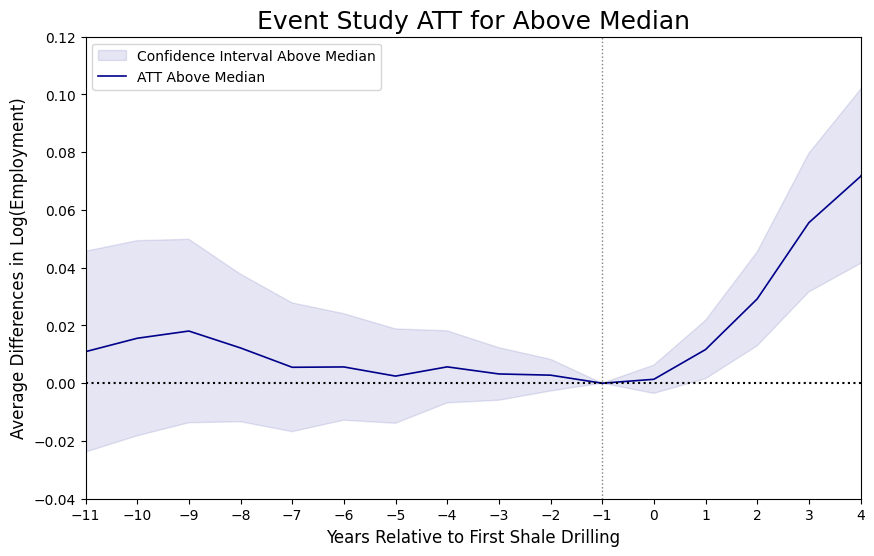

In [14]:
# Plotar o gráfico do Event Study para o subconjunto acima da mediana
plt.figure(figsize=(10, 6))

# Plotar o intervalo de confiança e linha de ATT para `es_above`
plt.fill_between(es_above_tab['relative_period'], es_above_tab['lower'], es_above_tab['upper'], color="darkblue", alpha=0.1, label='Confidence Interval Above Median')
plt.plot(es_above_tab['relative_period'], es_above_tab['ATT'], color="darkblue", linewidth=1.2, label='ATT Above Median')

# Linhas de referência
plt.axvline(x=-1, color='grey', linestyle="dotted", linewidth=1)
plt.axhline(y=0, color="black", linestyle="dotted")

# Configurações dos eixos
plt.xlabel("Years Relative to First Shale Drilling", fontsize=12)
plt.ylabel("Average Differences in Log(Employment)", fontsize=12)
plt.xticks(range(-11, 5, 1), fontsize=10)
plt.yticks([round(x * 0.02, 2) for x in range(-2, 7)], fontsize=10)  # Ajuste para intervalos de y
plt.ylim(-0.04, 0.12)
plt.xlim(-11, 4)

# Remover linhas de grade
plt.grid(False)

# Estilo do gráfico
plt.legend()
plt.title("Event Study ATT for Above Median", fontsize=18)

# Mostrar o gráfico
plt.show()

Agora vamos calcular para a intensidade abaixo da média.

In [15]:
# Preparar os dados para o subconjunto abaixo da mediana
data_bcgk_below_median['t1'] = data_bcgk_below_median['t']
data_bcgk_below_median['i1'] = data_bcgk_below_median['i']
data_bcgk_below_median['t1'] = data_bcgk_below_median['t'].astype(int)

# Definir a estrutura de painel com os índices apropriados
data_bcgk_below_median.set_index(['i1', 't1'], inplace=True)

# Estimar o ATT para o subconjunto abaixo da mediana
att_below = ATTgt(
    data=data_bcgk_below_median,
    cohort_name='G',
    base_period='universal'
)
att_below.fit(formula='y', control_group='not_yet_treated', est_method='reg')

# Agregar os resultados para obter o estudo de eventos
es_below = att_below.aggregate(type_of_aggregation="event", overall=False)
es_below.replace(["", "NA", None], np.nan, inplace=True)  # Substituir valores ausentes por NaN
es_below = es_below.fillna(0)  # Preencher os NaN com zero

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]     0%|                    | 0/200 [00:00<?, ?it/s]

Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 305.30it/s]


Ajustando a tabela para apresentar os resultados.

In [16]:
# Tabela única, com apenas uma linha de cabeçalho
es_below_tab = att_below.aggregate("event")
es_below_tab = es_below.reset_index()  # Transforma o índice em uma coluna
es_below_tab['relative_period'] = pd.to_numeric(es_below_tab['relative_period'])  # Converte para numérico
# Remover as duas primeiras linhas do DataFrame
es_below_tab = es_below_tab.iloc[2:].reset_index(drop=True)
# Renomear as colunas para os nomes corretos
es_below_tab.columns = ['relative_period', 'ATT', 'std_error', 'lower', 'upper', 'zero_not_in_cband']

Criando gráfico a partir dos resultados.

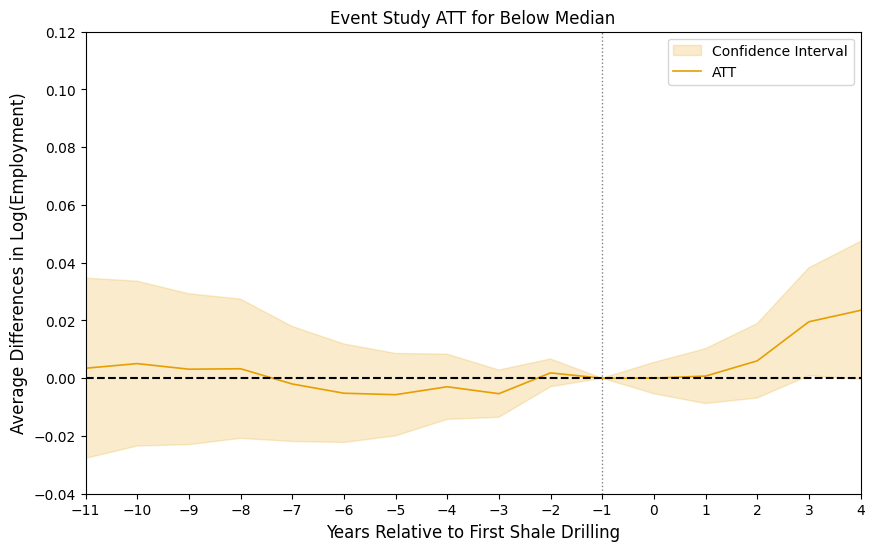

In [17]:
# Gráfico do Event Study para o subconjunto abaixo da mediana
plt.figure(figsize=(10, 6))

# Plotar o intervalo de confiança e linha de ATT para `es_below_tab`
plt.fill_between(es_below_tab['relative_period'], es_below_tab['lower'], es_below_tab['upper'], color="#E69F00", alpha=0.2, label='Confidence Interval')
plt.plot(es_below_tab['relative_period'], es_below_tab['ATT'], color="#E69F00", linewidth=1.2, label='ATT')

# Linhas de referência
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=-1, color='grey', linestyle="dotted", linewidth=1)

# Ajustar os limites do eixo x para focar no intervalo -11 a 4
plt.xlim(-11, 4)

# Configurações dos eixos
plt.xlabel("Years Relative to First Shale Drilling", fontsize=12)
plt.ylabel("Average Differences in Log(Employment)", fontsize=12)
plt.xticks(range(-11, 5, 1), fontsize=10)
plt.yticks([round(x * 0.02, 2) for x in range(-2, 7)], fontsize=10)  # Ajuste para intervalos de y
plt.ylim(-0.04, 0.12)
plt.xlim(-11, 4)

# Remover linhas de grade
plt.grid(False)

# Personalizar o gráfico
plt.legend()
plt.title("Event Study ATT for Below Median")

plt.show()

Vamos plotar os dois resultados conjuntamente em um gráfico.

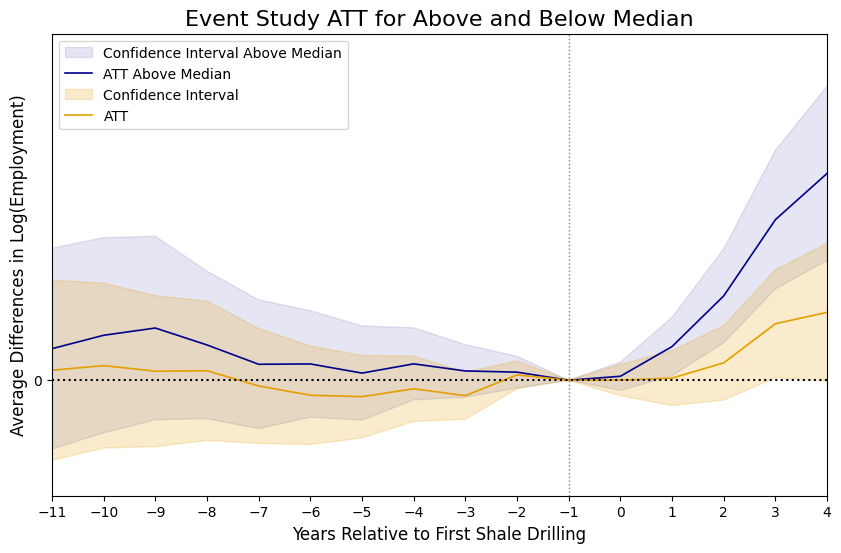

In [18]:
plt.figure(figsize=(10, 6))

# Plotar o intervalo de confiança e linha de ATT para `es_above_tab`
plt.fill_between(es_above_tab['relative_period'], es_above_tab['lower'], es_above_tab['upper'], color="darkblue", alpha=0.1, label='Confidence Interval Above Median')
plt.plot(es_above_tab['relative_period'], es_above_tab['ATT'], color="darkblue", linewidth=1.2, label='ATT Above Median')

# Plotar o intervalo de confiança e linha de ATT para `es_below_tab`
plt.fill_between(es_below_tab['relative_period'], es_below_tab['lower'], es_below_tab['upper'], color="#E69F00", alpha=0.2, label='Confidence Interval')
plt.plot(es_below_tab['relative_period'], es_below_tab['ATT'], color="#E69F00", linewidth=1.2, label='ATT')

# Linhas de referência
plt.axvline(x=-1, color='grey', linestyle="dotted", linewidth=1)
plt.axhline(y=0, color="black", linestyle="dotted")

# Configurações dos eixos
plt.xlabel("Years Relative to First Shale Drilling", fontsize=12)
plt.ylabel("Average Differences in Log(Employment)", fontsize=12)
plt.xticks(range(-11, 5, 1), fontsize=10)
plt.yticks([round(x, 2) for x in list(range(-4, 13, 2))], fontsize=10)
plt.ylim(-0.04, 0.12)
plt.xlim(-11, 4)

# Remover linhas de grade
plt.grid(False)

# Estilo do gráfico
plt.legend()
plt.title("Event Study ATT for Above and Below Median", fontsize=16)

# Mostrar o gráfico
plt.show()


Agora vamos avaliar o efeito médio agregado (considerando todas as doses conjuntamente).

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]     0%|                    | 0/200 [00:00<?, ?it/s]

Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 292.13it/s]


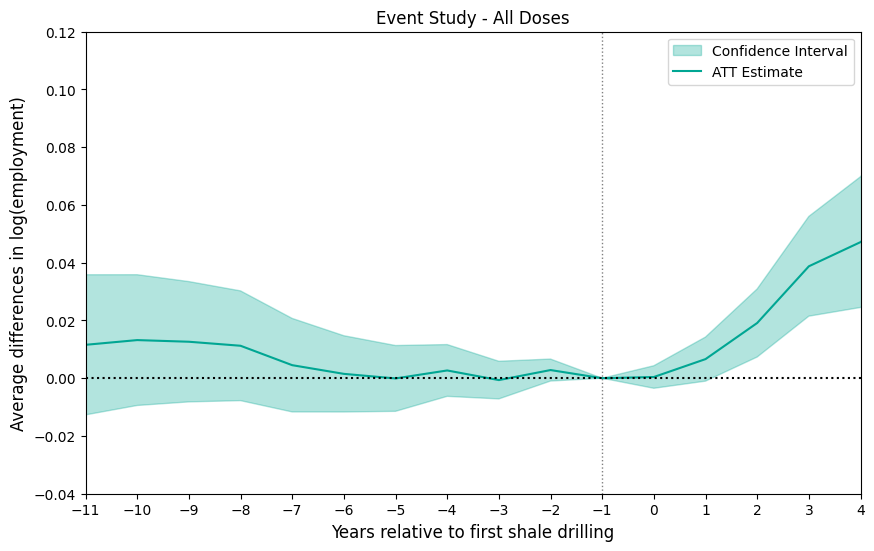

In [19]:
# Adicionar coluna G ajustada no dataframe
data_bcgk['G'] = np.where(data_bcgk['d'] == 0, np.inf, data_bcgk['G'])

data_bcgk['t1'] = data_bcgk['t']
data_bcgk['i1'] = data_bcgk['i']
data_bcgk['t1'] = data_bcgk['t'].astype(int)

# Definir os índices para a estrutura de painel
data_bcgk.set_index(['i1', 't1'], inplace=True)

# Estimar ATT para todas as unidades usando ATTgt do pacote differences
att_all = ATTgt(data=data_bcgk, cohort_name='G', base_period='universal')
att_all.fit(formula='y', control_group='not_yet_treated', est_method='reg')

# Agregar os resultados para o estudo de eventos
es_all = att_all.aggregate(type_of_aggregation="event")

# Tabela única, com apenas uma linha de cabeçalho
es_all_tab = es_all
es_all_tab = es_all_tab.reset_index()  # Transforma o índice em uma coluna
es_all_tab['relative_period'] = pd.to_numeric(es_all_tab['relative_period'])  # Converte para numérico
# Remover as duas primeiras linhas do DataFrame
es_all_tab = es_all_tab.iloc[2:].reset_index(drop=True)
# Renomear as colunas para os nomes corretos
es_all_tab.columns = ['relative_period', 'ATT', 'std_error', 'lower', 'upper', 'zero_not_in_cband']

# Ajustar os dados para o gráfico
es_all_tab.loc[es_all_tab['relative_period'] == -1, ['ATT', 'lower', 'upper']] = 0

# Gráfico: Estilo com tons de verde piscina brilhante
plt.figure(figsize=(10, 6))

# Preenchendo o intervalo de confiança com verde claro
plt.fill_between(es_all_tab['relative_period'], es_all_tab['lower'], es_all_tab['upper'], color="#00A693", alpha=0.3, label="Confidence Interval")

# Linha principal da estimativa em verde claro
plt.plot(es_all_tab['relative_period'], es_all_tab['ATT'], color="#00A693", linewidth=1.5, label="ATT Estimate")

# Ajustar os limites do eixo x para focar no intervalo -11 a 4
plt.xlim(-11, 4)

# Linhas de referência
plt.axvline(x=-1, color='grey', linestyle="dotted", linewidth=1)
plt.axhline(y=0, color="black", linestyle="dotted")

# Configurações dos eixos
plt.xlabel("Years relative to first shale drilling", fontsize=12)
plt.ylabel("Average differences in log(employment)", fontsize=12)
plt.xticks(range(-11, 5, 1))
plt.yticks(np.arange(-0.04, 0.14, 0.02))
plt.ylim(-0.04, 0.12)

# Título e legendas
plt.title("Event Study - All Doses", fontsize=12)
plt.legend()

# Mostrar o gráfico
plt.show()

In [20]:
# Adicionar coluna G ajustada no dataframe
data_bcgk['G'] = np.where(data_bcgk['d'] == 0, np.inf, data_bcgk['G'])

data_bcgk['t1'] = data_bcgk['t']
data_bcgk['i1'] = data_bcgk['i']
data_bcgk['t1'] = data_bcgk['t'].astype(int)

# Definir os índices para a estrutura de painel
data_bcgk.set_index(['i1', 't1'], inplace=True)

#criar coluna strata = 1, se d > 3.95, caso contrário, strata = 0
data_bcgk['strata'] = np.where(data_bcgk['d'] > 3.95, 1, 0)

att_gt2 = ATTgt(data=data_bcgk, cohort_name="G", strata_name="strata")
att_gt2.fit(formula="y", n_jobs=1)


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]     0%|                    | 0/384 [00:00<?, ?it/s]

Computing ATTgt [workers=1]   100%|████████████████████| 384/384 [00:02<00:00, 153.92it/s]


ATTgtResult                                 \
                                             analytic pointwise conf. band   
                                        ATT std_error                lower   
stratum cohort base_period time                                              
0       2001   1990        1991   -0.005282  0.007931            -0.020826   
               1991        1992    0.010907  0.006080            -0.001010   
               1992        1993    0.027284  0.005584             0.016340   
               1993        1994    0.003898  0.008057            -0.011894   
               1994        1995    0.021805  0.006779             0.008519   
...                                     ...       ...                  ...   
1       2012   2009        2010   -0.045227  0.010750            -0.066298   
               2010        2011   -0.014087  0.010463            -0.034595   
               2011        2012   -0.002027  0.005318            -0.012450   
                           2013    0.008617  0.013804            -0.018438   
                           2014    0.000084  0.022281            -0.043586   

                                                             
                                                             
                                    upper zero_not_in_cband  
stratum cohort base_period time                              
0       2001   1990        1991  0.010262                    
               1991        1992  0.022824                    
               1992        1993  0.038228                 *  
               1993        1994  0.019690                    
               1994        1995  0.035091                 *  
...                                   ...               ...  
1       2012   2009        2010 -0.024157                 *  
               2010        2011  0.006421                    
               2011        2012  0.008396                    
                           2013  0.035672                    
                           2014  0.043754                    

[384 rows x 5 columns]

In [21]:
tab2 = att_gt2.aggregate("event")
tab2

EventAggregation                                 \
                                          analytic pointwise conf. band   
                                     ATT std_error                lower   
stratum relative_period                                                   
0       -21                    -0.012892  0.005710            -0.024083   
        -20                    -0.005674  0.006441            -0.018298   
        -19                     0.000392  0.005554            -0.010494   
        -18                    -0.002330  0.005478            -0.013067   
        -17                    -0.010167  0.003318            -0.016670   
...                                  ...       ...                  ...   
1        9                      0.166316  0.038635             0.090593   
         10                     0.163123  0.046082             0.072804   
         11                     0.177542  0.049864             0.079811   
         12                     0.202078  0.052648             0.098890   
         13                     0.223829  0.055244             0.115552   

                                                     
                                                     
                            upper zero_not_in_cband  
stratum relative_period                              
0       -21             -0.001701                 *  
        -20              0.006950                    
        -19              0.011278                    
        -18              0.008406                    
        -17             -0.003664                 *  
...                           ...               ...  
1        9               0.242038                 *  
         10              0.253443                 *  
         11              0.275274                 *  
         12              0.305267                 *  
         13              0.332106                 *  

[70 rows x 5 columns]

### Nonparametric Estimates

Empirical application based on Bartik, Currie, Greenstone, Knittel (2019, AEJ).

Nessa análise consideramos os dados de curto e longo prazos, e verificamos como a intensidade do tratamento afeta o resultado nesses períodos selecionados.

In [22]:
# Importar pacotes necessários
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrix
from scipy.linalg import pinv
import matplotlib.pyplot as plt

# Definir a semente para reprodutibilidade
np.random.seed(20240103)

In [23]:
# Função para calcular splines cúbicas e ajustar o modelo
def fit_cubic_spline(data, dependent_var, independent_var, cluster_col):
    # Definir os quantis e criar splines cúbicas para a variável independente
    knots = np.quantile(data[independent_var], [0.25, 0.5, 0.75])
    spline_terms = dmatrix(f"bs({independent_var}, knots=({knots[0]}, {knots[1]}, {knots[2]}), degree=3, include_intercept=True) - 1", 
                           data, return_type='dataframe')
    
    # Adicionar splines ao DataFrame
    data_splines = pd.concat([data[[dependent_var, cluster_col]], spline_terms], axis=1)
    
    # Ajustar o modelo OLS com erros padrão ajustados por cluster
    model = sm.OLS(data[dependent_var], spline_terms)
    results = model.fit(cov_type='cluster', cov_kwds={'groups': data[cluster_col]})
    
    return results

# Aplicar a função para os três conjuntos de dados
splines_SR = fit_cubic_spline(data_bcgk_SR, 'ddY', 'd', 'i')
splines_LR = fit_cubic_spline(data_bcgk_LR, 'ddY', 'd', 'i')
splines_all = fit_cubic_spline(data_bcgk_0_4, 'ddY', 'd', 'i')

# Calcular ATT(d|d) para cada valor da dose d usando as previsões dos modelos
att_SR = splines_SR.predict()
att_LR = splines_LR.predict()
att_all = splines_all.predict()

In [24]:
# Função para calcular splines cúbicas para dosagem
def calculate_spline_dosage(data, independent_var):
    # Definir os quantis e criar splines cúbicas para a variável independente
    knots = np.quantile(data[independent_var], [0.25, 0.5, 0.75])
    spline_dosage = dmatrix(f"bs({independent_var}, knots=({knots[0]}, {knots[1]}, {knots[2]}), degree=3, include_intercept=True) - 1", 
                            data, return_type='dataframe')
    return spline_dosage

# Calcular splines de dosagem para SR, LR e todos os valores
spline_dosage_SR = calculate_spline_dosage(data_bcgk_SR, 'd')
spline_dosage_LR = calculate_spline_dosage(data_bcgk_LR, 'd')
spline_dosage_all = calculate_spline_dosage(data_bcgk_0_4, 'd')

# Tamanho da amostra para cada conjunto de dados
n_treated_SR = len(data_bcgk_SR['d'])
n_treated_LR = len(data_bcgk_LR['d'])
n_treated_all = len(data_bcgk_0_4['d'])

# Exibir os tamanhos das amostras
print("Tamanho da amostra - SR:", n_treated_SR)
print("Tamanho da amostra - LR:", n_treated_LR)
print("Tamanho da amostra - Todos os valores:", n_treated_all)


Tamanho da amostra - SR: 330
Tamanho da amostra - LR: 308
Tamanho da amostra - Todos os valores: 308


In [25]:
# Função para calcular a função de influência da spline beta
def calculate_influence_function(splines, residuals, spline_dosage, n_treated):
    # Converter residuals para um array NumPy e redimensionar
    residuals_array = residuals.to_numpy().reshape(-1, 1)
    
    # Calcular a matriz pseudo-inversa
    ginv_matrix = pinv(spline_dosage.T @ spline_dosage / n_treated)
    
    # Calcular a função de influência para a regressão
    infl_reg = residuals_array * (spline_dosage @ ginv_matrix)
    
    # Ajustar a multiplicação para garantir o alinhamento correto
    infl_att = infl_reg @ spline_dosage.to_numpy().T
    
    return infl_att

# Calcular as funções de influência
infl_att_SR = calculate_influence_function(splines_SR, splines_SR.resid, spline_dosage_SR, n_treated_SR)
infl_att_LR = calculate_influence_function(splines_LR, splines_LR.resid, spline_dosage_LR, n_treated_LR)
infl_att_all = calculate_influence_function(splines_all, splines_all.resid, spline_dosage_all, n_treated_all)

# Calcular o erro padrão
se_att_SR = np.sqrt(np.mean(infl_att_SR ** 2, axis=0) / n_treated_SR)
se_att_LR = np.sqrt(np.mean(infl_att_LR ** 2, axis=0) / n_treated_LR)
se_att_all = np.sqrt(np.mean(infl_att_all ** 2, axis=0) / n_treated_all)

# Organizar os resultados em data frames
results_cdid_SR = pd.DataFrame({
    'd': data_bcgk_SR['d'],
    'att': att_SR,
    'p_uci_att': att_SR + 1.96 * se_att_SR,
    'p_lci_att': att_SR - 1.96 * se_att_SR
}).query('d < 6 and d > 2')

results_cdid_LR = pd.DataFrame({
    'd': data_bcgk_LR['d'],
    'att': att_LR,
    'p_uci_att': att_LR + 1.96 * se_att_LR,
    'p_lci_att': att_LR - 1.96 * se_att_LR
}).query('d < 6 and d > 2')

results_cdid_all = pd.DataFrame({
    'd': data_bcgk_0_4['d'],
    'att': att_all,
    'p_uci_att': att_all + 1.96 * se_att_all,
    'p_lci_att': att_all - 1.96 * se_att_all
}).query('d < 6 and d > 2')

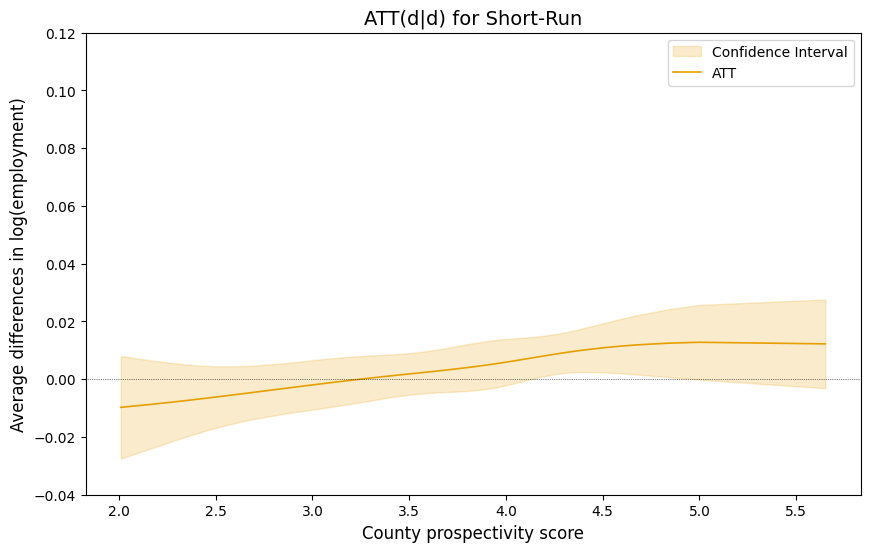

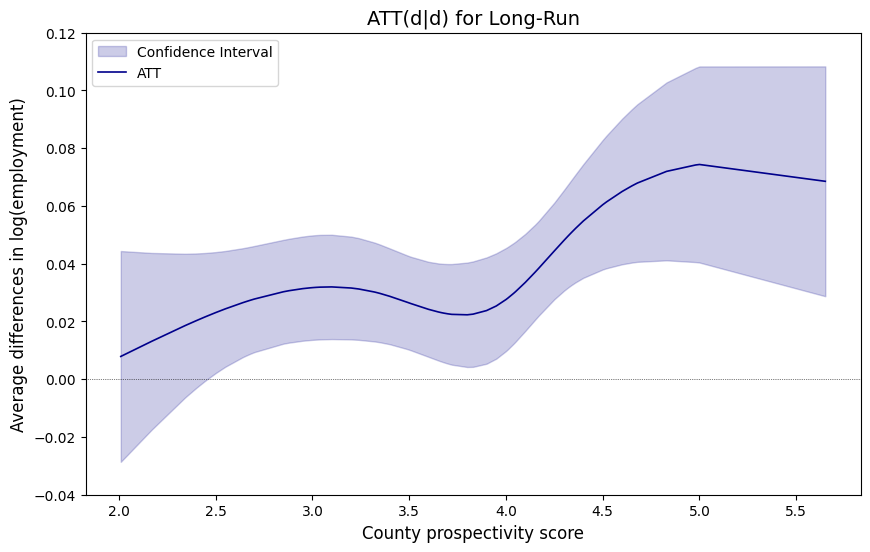

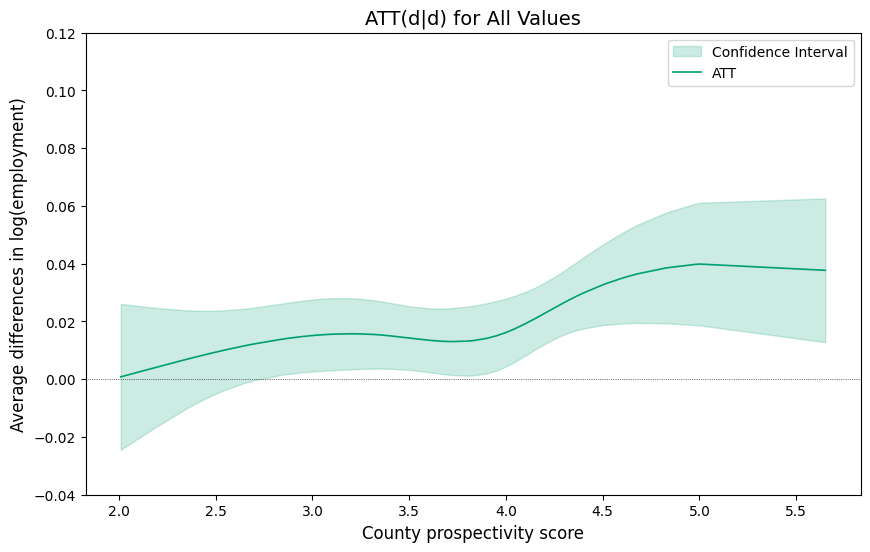

In [26]:
# Função para agregar os dados
def aggregate_data(data):
    # Calcular a média de 'att', 'p_lci_att', e 'p_uci_att' para cada valor único de 'd'
    aggregated_data = data.groupby('d').agg({
        'att': 'mean',
        'p_lci_att': 'mean',
        'p_uci_att': 'mean'
    }).reset_index()
    return aggregated_data

# Função para gerar o gráfico com intervalo de confiança
def plot_att_with_confidence(data, color, title, xlabel="County prospectivity score", ylabel="Average differences in log(employment)"):
    plt.figure(figsize=(10, 6))
    
    # Preenchimento do intervalo de confiança
    plt.fill_between(data['d'], data['p_lci_att'], data['p_uci_att'], color=color, alpha=0.2, label="Confidence Interval")
    # Linha central de ATT
    plt.plot(data['d'], data['att'], color=color, linewidth=1.2, label="ATT")
    
    # Linha de referência em y=0
    plt.axhline(y=0, color="black", linestyle="dotted", linewidth=0.5)
    
    # Remover linhas de grade
    plt.grid(False)
    
    # Configurações do eixo y e título
    plt.ylim(-0.04, 0.12)
    plt.yticks(np.arange(-0.04, 0.13, 0.02))
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.show()

# Agregar os dados
aggregated_SR = aggregate_data(results_cdid_SR)
aggregated_LR = aggregate_data(results_cdid_LR)
aggregated_all = aggregate_data(results_cdid_all)

# Gráficos para SR, LR e Todos os Valores
plot_att_with_confidence(aggregated_SR, color="#E69F00", title="ATT(d|d) for Short-Run")
plot_att_with_confidence(aggregated_LR, color="darkblue", title="ATT(d|d) for Long-Run")
plot_att_with_confidence(aggregated_all, color="#009E73", title="ATT(d|d) for All Values")

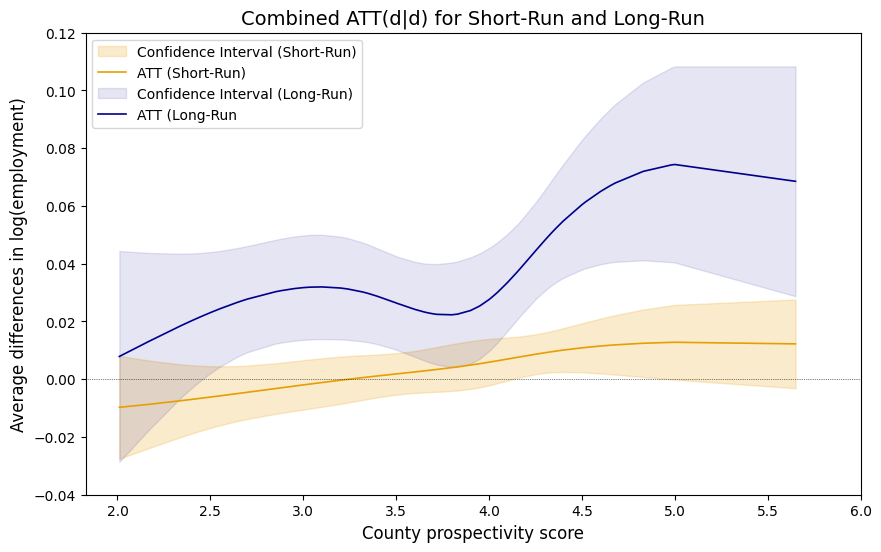

In [27]:
# Gráfico combinado para SR (Curto Prazo) e LR (Longo Prazo)
plt.figure(figsize=(10, 6))

# Curto Prazo (Short-Run)
plt.fill_between(aggregated_SR['d'], aggregated_SR['p_lci_att'], aggregated_SR['p_uci_att'], 
                 color="#E69F00", alpha=0.2, label="Confidence Interval (Short-Run)")
plt.plot(aggregated_SR['d'], aggregated_SR['att'], color="#E69F00", linewidth=1.2, label="ATT (Short-Run)")

# Longo Prazo (Long-Run)
plt.fill_between(aggregated_LR['d'], aggregated_LR['p_lci_att'], aggregated_LR['p_uci_att'], 
                 color="darkblue", alpha=0.1, label="Confidence Interval (Long-Run)")
plt.plot(aggregated_LR['d'], aggregated_LR['att'], color="darkblue", linewidth=1.2, label="ATT (Long-Run")

# Linha de referência em y=0
plt.axhline(y=0, color="black", linestyle="dotted", linewidth=0.5)

# Remover linhas de grade
plt.grid(False)

# Configurações dos eixos e título
plt.ylim(-0.04, 0.12)
plt.yticks(np.arange(-0.04, 0.13, 0.02))
plt.xticks(np.arange(2, 6.5, 0.5))
plt.xlabel("County prospectivity score", fontsize=12)
plt.ylabel("Average differences in log(employment)", fontsize=12)
plt.title("Combined ATT(d|d) for Short-Run and Long-Run", fontsize=14)
plt.legend()

# Exibir o gráfico
plt.show()


---

Tamanho da amostra - SR: 330
Tamanho da amostra - LR: 308
Tamanho da amostra - ALL: 330


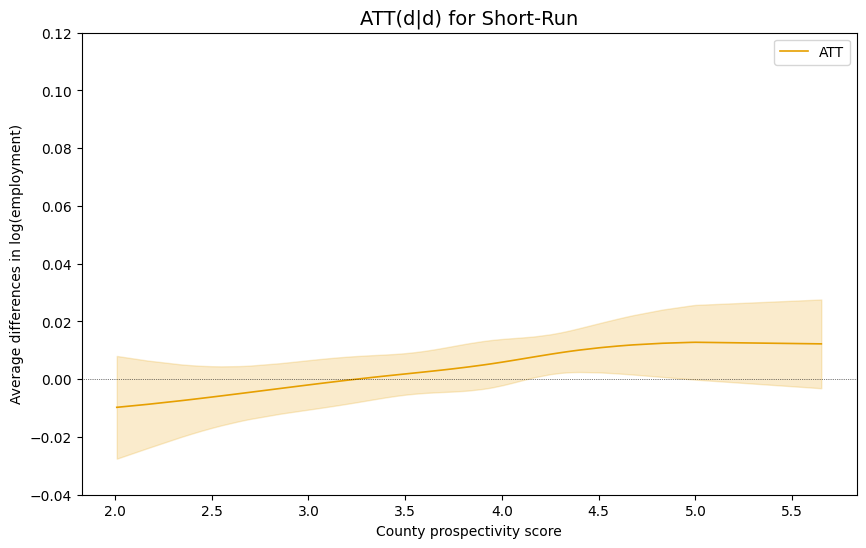

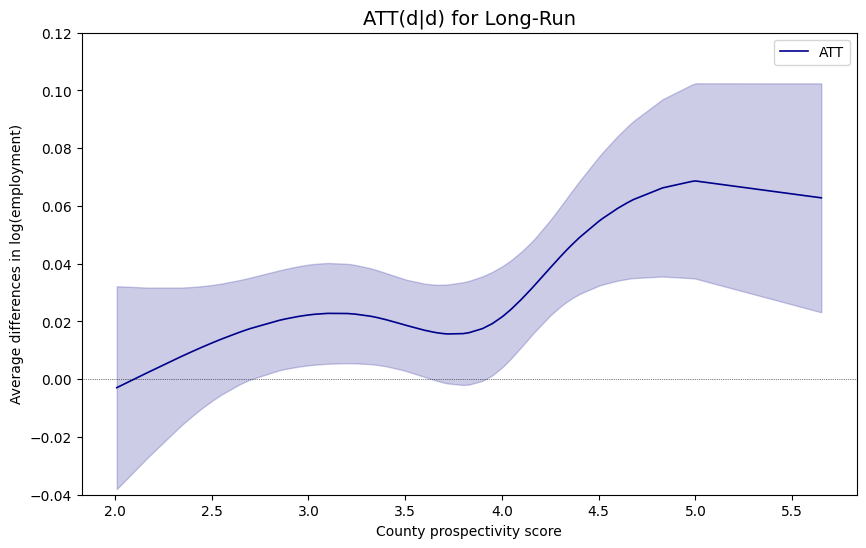

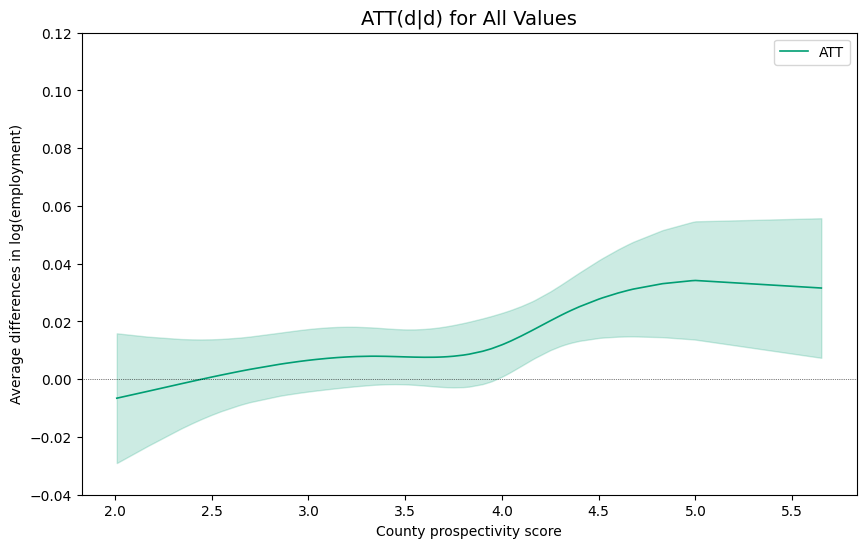

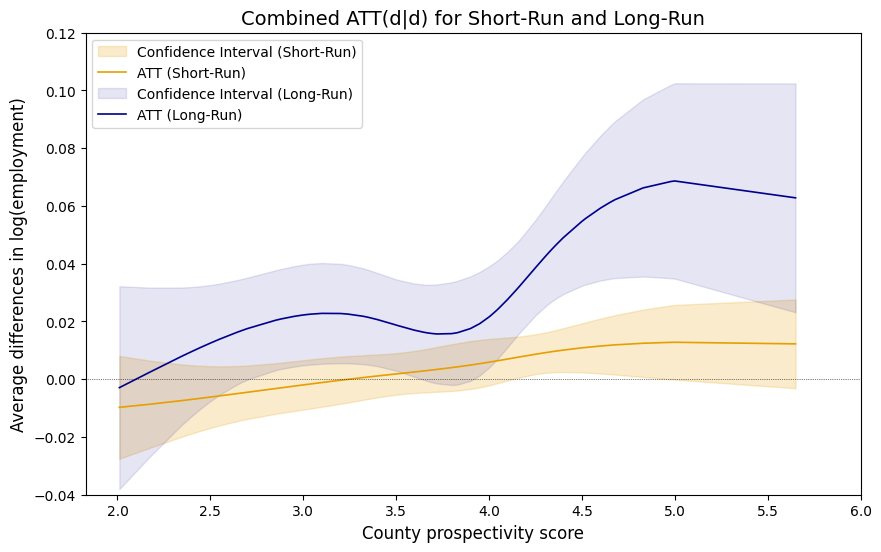

In [63]:
# ============================================================
# CGBS (2024) — Replication-style, com cabeçalho de parâmetros
# Mantém sua lógica original, títulos e cores.
# ============================================================

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix
from scipy.linalg import pinv
from differences import ATTgt

# ------------------- PARÂMETROS -------------------
DATA_SRC  = "https://github.com/Daniel-Uhr/data/raw/main/bcgk_replication.dta"
SEED      = 20240103

# Controle no ATTgt: "not_yet" (recomendado) ou "never"
CONTROL   = "not_yet"
REF       = -1        # período de referência no Event Study
SHOW_REF_POINT = False

# Modelo da curva dose–resposta: "nonparametric" (splines) ou "parametric"
DOSE_RESPONSE_MODEL = "nonparametric"
POLY_DEGREE         = 3

# Janela de análise de curto, longo prazo e agregado
WINDOW_SR  = (0, 2)
WINDOW_LR  = (3, 4)
WINDOW_ALL = (0, 4)

# Suporte central para exibir as curvas
TRIM_DOSE_DISPLAY = (2.0, 6.0)

# ------------------- DADOS -------------------
random.seed(SEED)
np.random.seed(SEED)

data_bcgk = pd.read_stata(DATA_SRC)
data_bcgk.sort_values(['i', 't'], inplace=True)
data_bcgk = data_bcgk.dropna(subset=['y']).copy()

# G = inf para nunca tratados
data_bcgk.loc[data_bcgk['d'] == 0, 'G'] = np.inf
data_bcgk['i'] = data_bcgk['i'].astype(int)
data_bcgk['t'] = data_bcgk['t'].astype(int)

# ------------------- FUNÇÕES AUXILIARES -------------------
def build_time_averaged(df, e1=0, e2=2):
    """
    Constrói a base tempo-médio como no seu código original:
    baseline = G-1.
    """
    results = []
    for g in df['G'].unique():
        if not np.isfinite(g):  # pula never-treated
            continue
        temp = df[(df['G'] == g) | (df['d'] == 0)].copy()
        temp['G_cs'] = np.where(temp['d'] == 0, np.inf, temp['G'])
        temp['event_time_cs'] = temp['t'] - temp['G_cs']
        temp = temp[(temp['t'] >= g-1) & (temp['t'] <= g+e2)]

        # baseline = Y_{g-1}
        temp['dY'] = temp['y'] - temp.groupby('i')['y'].transform(
            lambda x: x[temp['t'] == g-1].iloc[0] if (temp['t'] == g-1).any() else np.nan
        )

        # NYT mean
        temp['mean_dY_NYT'] = temp.groupby('t')['dY'].transform(
            lambda x: x[temp['G_cs'] > temp['t']].mean()
        )

        temp['ddY'] = temp['dY'] - temp['mean_dY_NYT']

        temp2 = temp[(temp['G_cs'] == g) &
                     (temp['event_time_cs'] >= e1) &
                     (temp['event_time_cs'] <= e2)].copy()

        if not temp2.empty:
            grouped = temp2.groupby(['i','G']).agg(
                ddY=('ddY','mean'), d=('d','mean')
            ).reset_index()
            results.append(grouped)

    if len(results) == 0:
        return pd.DataFrame(columns=['i','G','ddY','d'])
    return pd.concat(results, ignore_index=True)

def fit_cubic_spline(data, dep, indep, cluster_col='i'):
    knots = np.quantile(data[indep], [0.25,0.5,0.75])
    spline_terms = dmatrix(
        f"bs({indep}, knots=({knots[0]}, {knots[1]}, {knots[2]}), degree=3, include_intercept=True) - 1",
        data, return_type='dataframe'
    )
    model = sm.OLS(data[dep], spline_terms)
    res = model.fit(cov_type='cluster', cov_kwds={'groups': data[cluster_col]})
    return res, spline_terms

def calculate_influence_function(results, spline_dosage):
    residuals = results.resid.to_numpy().reshape(-1,1)
    n = spline_dosage.shape[0]
    ginv = pinv(spline_dosage.T @ spline_dosage / n)
    infl_reg = residuals * (spline_dosage @ ginv)
    return infl_reg @ spline_dosage.to_numpy().T

def dose_response_curve(avg_df, window_tag):
    if avg_df.empty:
        print(f"[{window_tag}] vazio")
        return pd.DataFrame(columns=['d','att','p_lci_att','p_uci_att'])

    if DOSE_RESPONSE_MODEL == "nonparametric":
        res, Xs = fit_cubic_spline(avg_df, 'ddY','d','i')
        att_hat = res.predict()
        infl = calculate_influence_function(res, Xs)
        n = len(avg_df['d'])
        se = np.sqrt(np.mean(infl**2, axis=0)/n)
    else:
        X = np.column_stack([avg_df['d']**k for k in range(0,POLY_DEGREE+1)])
        res = sm.OLS(avg_df['ddY'], X).fit(cov_type='cluster', cov_kwds={'groups':avg_df['i']})
        V = res.cov_params()
        att_hat = X @ res.params
        var_pred = np.einsum("ni,ij,nj->n", X,V,X)
        se = np.sqrt(var_pred)

    out = pd.DataFrame({
        'd': avg_df['d'], 'att': att_hat,
        'p_uci_att': att_hat + 1.96*se,
        'p_lci_att': att_hat - 1.96*se
    })
    if TRIM_DOSE_DISPLAY:
        lo,hi = TRIM_DOSE_DISPLAY
        out = out.query('d>@lo and d<@hi')

    out = out.groupby('d').mean().reset_index()
    for c in ['d','att','p_lci_att','p_uci_att']:
        out[c] = pd.to_numeric(out[c], errors='coerce')
    out = out.dropna().sort_values('d')

    color,title = {
        "SR":("#E69F00","ATT(d|d) for Short-Run"),
        "LR":("darkblue","ATT(d|d) for Long-Run"),
        "ALL":("#009E73","ATT(d|d) for All Values")
    }[window_tag]

    plt.figure(figsize=(10,6))
    plt.fill_between(out['d'], out['p_lci_att'], out['p_uci_att'], color=color, alpha=0.2)
    plt.plot(out['d'], out['att'], color=color, linewidth=1.2, label="ATT")
    plt.axhline(0,color="black",linestyle="dotted",linewidth=0.5)
    plt.grid(False); plt.ylim(-0.04,0.12); plt.yticks(np.arange(-0.04,0.13,0.02))
    plt.title(title,fontsize=14)
    plt.xlabel("County prospectivity score"); plt.ylabel("Average differences in log(employment)")
    plt.legend(); plt.show()
    return out

# ------------------- RODAR -------------------
# Bases tempo-médio
data_SR  = build_time_averaged(data_bcgk, *WINDOW_SR)
data_LR  = build_time_averaged(data_bcgk, *WINDOW_LR)
data_ALL = build_time_averaged(data_bcgk, *WINDOW_ALL)

print("Tamanho da amostra - SR:", len(data_SR))
print("Tamanho da amostra - LR:", len(data_LR))
print("Tamanho da amostra - ALL:", len(data_ALL))

# Curvas
agg_SR  = dose_response_curve(data_SR, "SR")
agg_LR  = dose_response_curve(data_LR, "LR")
agg_ALL = dose_response_curve(data_ALL, "ALL")

# ==== COMBINED: Short-Run (SR) + Long-Run (LR) ====

# 1) Pega os dataframes de curvas (independe do nome que você usou acima)
sr_df = locals().get('agg_SR', locals().get('aggregated_SR'))
lr_df = locals().get('agg_LR', locals().get('aggregated_LR'))

# 2) Helper para higienizar antes de plotar
def _ensure_numeric_for_plot(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for c in ['d', 'att', 'p_lci_att', 'p_uci_att']:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    return df.dropna(subset=['d','att','p_lci_att','p_uci_att']).sort_values('d')

have_SR = isinstance(sr_df, pd.DataFrame) and not sr_df.empty
have_LR = isinstance(lr_df, pd.DataFrame) and not lr_df.empty

if have_SR:
    sr_df = _ensure_numeric_for_plot(sr_df)
    have_SR = not sr_df.empty
if have_LR:
    lr_df = _ensure_numeric_for_plot(lr_df)
    have_LR = not lr_df.empty

# 3) Gráfico combinado (igual ao seu estilo)
if have_SR or have_LR:
    plt.figure(figsize=(10, 6))

    # Curto Prazo (Short-Run)
    if have_SR:
        plt.fill_between(
            sr_df['d'], sr_df['p_lci_att'], sr_df['p_uci_att'],
            color="#E69F00", alpha=0.2, label="Confidence Interval (Short-Run)"
        )
        plt.plot(
            sr_df['d'], sr_df['att'],
            color="#E69F00", linewidth=1.2, label="ATT (Short-Run)"
        )

    # Longo Prazo (Long-Run)
    if have_LR:
        plt.fill_between(
            lr_df['d'], lr_df['p_lci_att'], lr_df['p_uci_att'],
            color="darkblue", alpha=0.1, label="Confidence Interval (Long-Run)"
        )
        plt.plot(
            lr_df['d'], lr_df['att'],
            color="darkblue", linewidth=1.2, label="ATT (Long-Run)"
        )

    # Linha de referência em y=0
    plt.axhline(y=0, color="black", linestyle="dotted", linewidth=0.5)

    # Remover linhas de grade
    plt.grid(False)

    # Configurações dos eixos e título
    plt.ylim(-0.04, 0.12)
    plt.yticks(np.arange(-0.04, 0.13, 0.02))
    plt.xticks(np.arange(2, 6.5, 0.5))
    plt.xlabel("County prospectivity score", fontsize=12)
    plt.ylabel("Average differences in log(employment)", fontsize=12)
    plt.title("Combined ATT(d|d) for Short-Run and Long-Run", fontsize=14)
    plt.legend()

    # Exibir o gráfico
    plt.show()
else:
    print("[combined] Nada para plotar: SR e/ou LR estão vazios.")

In [64]:
print(aggregated_SR.head())


Empty DataFrame
Columns: [d, att, p_uci_att, p_lci_att]
Index: []


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(


Quantis de dose (5% e 95%): [2.3499999  6.30999994]
Mínimo de doses positivas: 0.20000000298023224
Máximo de doses positivas: 9.34000015258789


Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 368.80it/s]


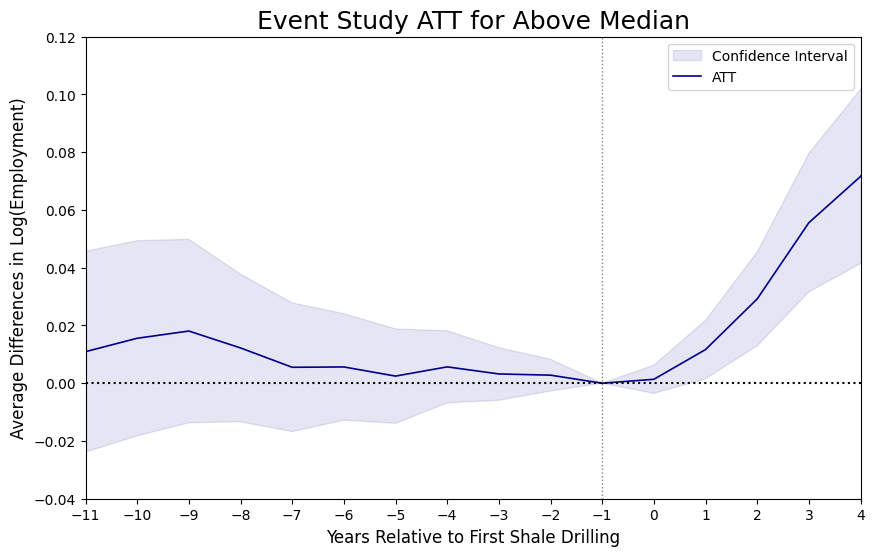

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 289.40it/s]


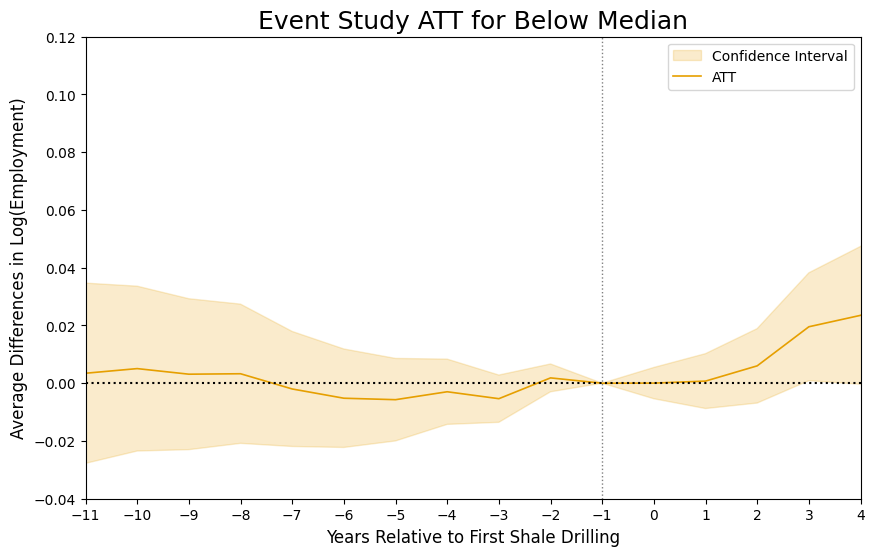

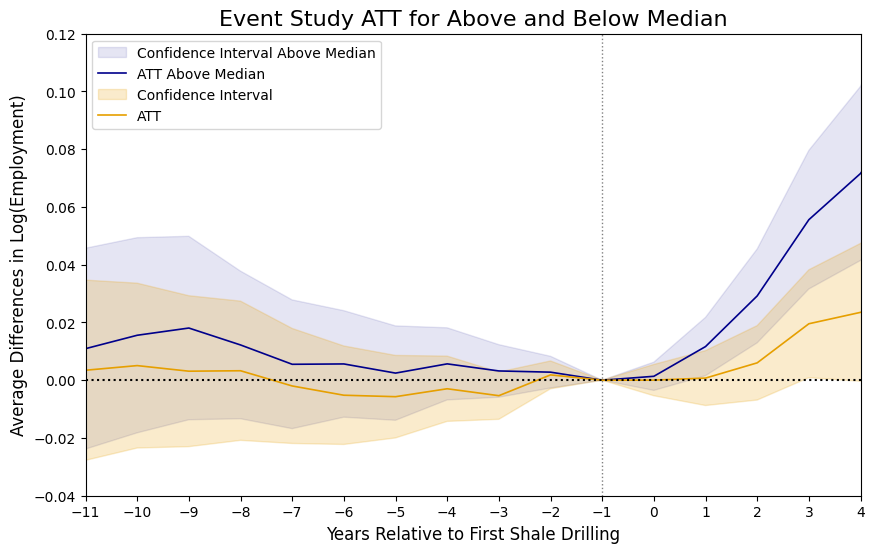

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 350.11it/s]


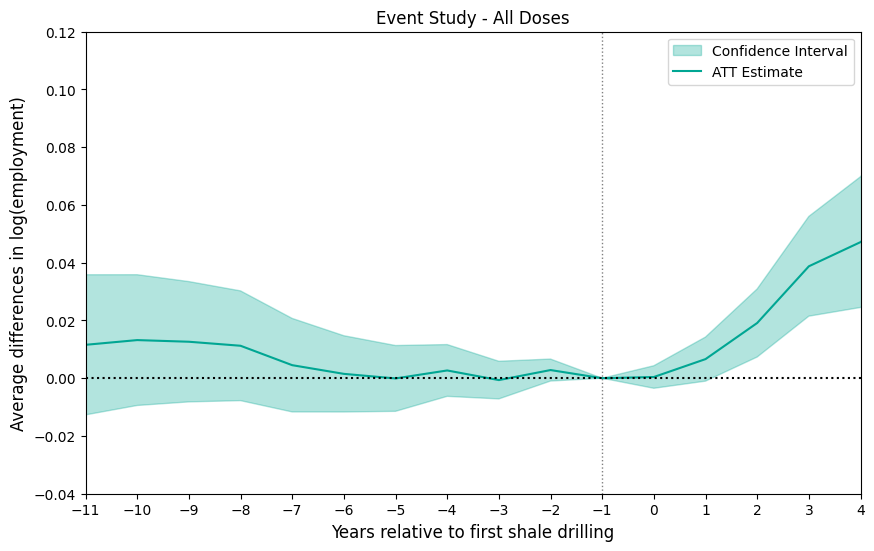

Tamanho da amostra - SR: 0
Tamanho da amostra - LR: 0
Tamanho da amostra - Todos os valores: 0
[SR] time-averaged sample is empty.
[LR] time-averaged sample is empty.
[ALL] time-averaged sample is empty.
[combined] Nada para plotar: SR e LR estão vazios.


In [61]:
# ============================================================
# CGBS (2024) — Replication-style, parameterized, but preserving your original style
# Keeps your titles, colors, and plotting aesthetics.
# ============================================================

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix
from scipy.linalg import pinv
from differences import ATTgt

# --------------- PARAMETERS (customize here) ---------------
# Data source (use your own DataFrame if already loaded)
DATA_SRC = "https://github.com/Daniel-Uhr/data/raw/main/bcgk_replication.dta"  # or None if you pass df directly
USE_DF_DIRECT = False      # set True if you already have a DataFrame named `data_input`

# Column mapping (so you can re-use on other datasets with different names)
COL_ID    = "i"
COL_TIME  = "t"
COL_OUT   = "y"
COL_DOSE  = "d"
COL_G     = "G"

# Sample tweaks
EXCLUDE_YEARS = [2015]     # [] to keep all years
SEED = 20240103

# Controls for ATTgt Event Study
CONTROL       = "not_yet"  # "not_yet" (recommended) or "never"
BASE_PERIOD   = "universal"
REF           = -1         # reference period in the event study
SHOW_REF_POINT = False     # if False, do not show the point at REF in plots
SHOW_ATT_LINE  = False     # (not used here; kept for symmetry with your BJS script)
X_LIM_ES       = (-11, 4)  # x-axis limits for ES

# Dose split (bins) — defaults replicate your original thresholds
LOW_BIN   = (0.20, 3.95)   # inclusive
HIGH_BIN  = (3.96, 9.35)   # inclusive

# Short/Long/All windows for dose–response curves
WINDOW_SR  = (0, 2)
WINDOW_LR  = (3, 4)
WINDOW_ALL = (0, 4)

# Central support trimming for display (to avoid extrapolation)
TRIM_DOSE_DISPLAY = (2.0, 6.0)   # set to None to disable

# Baseline mode for time-averaged construction (to avoid NaNs)
# "last_pre_t" = use the last available pre-treatment year per unit (robust if years are excluded)
# "g_minus_1"  = use G - 1 (your original strict baseline; may create NaNs if that year was excluded)
BASELINE_MODE = "last_pre_t"     # "last_pre_t" (default) or "g_minus_1"

# Dose–response model: nonparametric = cubic splines (your original); parametric = global polynomial
DOSE_RESPONSE_MODEL = "nonparametric"   # "nonparametric" or "parametric"
POLY_DEGREE         = 3                 # used if parametric

# ----------------- LOAD & PREP -----------------
if USE_DF_DIRECT:
    data_bcgk = data_input.copy()
else:
    data_bcgk = pd.read_stata(DATA_SRC)

# Keep your reproducibility
random.seed(SEED)
np.random.seed(SEED)

# Sort panel
data_bcgk.sort_values([COL_ID, COL_TIME], inplace=True)

# Optional: exclude specific years (e.g., 2015), exactly like you did
if EXCLUDE_YEARS:
    data_bcgk = data_bcgk[~data_bcgk[COL_TIME].isin(EXCLUDE_YEARS)].copy()

# Basic checks / typing
data_bcgk = data_bcgk.dropna(subset=[COL_OUT]).copy()
data_bcgk[COL_ID] = data_bcgk[COL_ID].astype(int)
data_bcgk[COL_TIME] = pd.to_numeric(data_bcgk[COL_TIME], errors="coerce").astype(int)

# Set G = inf for never-treated (dose == 0) — same convention you used later
data_bcgk[COL_G] = pd.to_numeric(data_bcgk[COL_G], errors="coerce")
data_bcgk.loc[data_bcgk[COL_DOSE] == 0, COL_G] = np.inf

# ----------------- MEDIAN & QUANTILES (as you did) -----------------
median_d = data_bcgk.loc[data_bcgk[COL_DOSE] > 0, COL_DOSE].median()

quantiles_d = np.quantile(data_bcgk[data_bcgk[COL_DOSE] > 0][COL_DOSE], [0.05, 0.95])
min_d_pos = data_bcgk[data_bcgk[COL_DOSE] > 0][COL_DOSE].min()
max_d_pos = data_bcgk[data_bcgk[COL_DOSE] > 0][COL_DOSE].max()

print("Quantis de dose (5% e 95%):", quantiles_d)
print("Mínimo de doses positivas:", min_d_pos)
print("Máximo de doses positivas:", max_d_pos)

# Flags above/below treated median (exactly like yours)
data_bcgk["d_above_treated_median"] = (data_bcgk[COL_DOSE] > median_d).astype(int)
data_bcgk["d_below_treated_median"] = ((data_bcgk[COL_DOSE] <= median_d) & (data_bcgk[COL_DOSE] > 0)).astype(int)

# Subsets for above/below median or never-treated (same logic of your code)
data_bcgk_above_median = data_bcgk[(data_bcgk["d_above_treated_median"] == 1) | (data_bcgk[COL_DOSE] == 0)].copy()
data_bcgk_above_median[COL_G] = np.where(data_bcgk_above_median[COL_DOSE] == 0, np.inf, data_bcgk_above_median[COL_G])

data_bcgk_below_median = data_bcgk[(data_bcgk["d_below_treated_median"] == 1) | (data_bcgk[COL_DOSE] == 0)].copy()
data_bcgk_below_median[COL_G] = np.where(data_bcgk_below_median[COL_DOSE] == 0, np.inf, data_bcgk_below_median[COL_G])

# -------------- Helpers to run ATTgt Event Study (your same flow) --------------

def attgt_event_es(df_sub, title_for_plot, color_ci, color_line):
    # Build ATTgt data index (your same pattern)
    df_sub = df_sub.copy()
    df_sub["t1"] = df_sub[COL_TIME].astype(int)
    df_sub["i1"] = df_sub[COL_ID].astype(int)
    df_sub = df_sub.set_index(["i1", "t1"]).sort_index()

    # ATTgt (control group choice as your parameter)
    if CONTROL == "not_yet":
        cg = "not_yet_treated"
    elif CONTROL == "never":
        cg = "never_treated"
    else:
        raise ValueError("CONTROL deve ser 'not_yet' ou 'never'.")

    att = ATTgt(
        data=df_sub,
        cohort_name=COL_G,
        base_period=BASE_PERIOD
    )
    att.fit(formula=COL_OUT, control_group=cg, est_method='reg')

    # Aggregate to event study (your same post-processing)
    es = att.aggregate(type_of_aggregation="event", overall=False)
    es.replace(["", "NA", None], np.nan, inplace=True)
    es = es.fillna(0)
    es_tab = es.reset_index()
    es_tab["relative_period"] = pd.to_numeric(es_tab["relative_period"])
    # Drop the two header-like first rows (as you did)
    es_tab = es_tab.iloc[2:].reset_index(drop=True)
    es_tab.columns = ['relative_period', 'ATT', 'std_error', 'lower', 'upper', 'zero_not_in_cband']

    # Force REF to zero (keeping your style)
    es_tab.loc[es_tab['relative_period'] == REF, ['ATT', 'lower', 'upper']] = 0

    # Plot (exact same titles, axes, colors)
    plt.figure(figsize=(10, 6))
    plt.fill_between(es_tab['relative_period'], es_tab['lower'], es_tab['upper'],
                     color=color_ci, alpha=0.2 if color_ci != "darkblue" else 0.1,
                     label='Confidence Interval')
    plt.plot(es_tab['relative_period'], es_tab['ATT'], color=color_line, linewidth=1.2, label='ATT')

    plt.axvline(x=REF, color='grey', linestyle="dotted", linewidth=1)
    plt.axhline(y=0, color="black", linestyle="dotted")
    plt.xlabel("Years Relative to First Shale Drilling", fontsize=12)
    plt.ylabel("Average Differences in Log(Employment)", fontsize=12)
    plt.xticks(range(X_LIM_ES[0], X_LIM_ES[1] + 1, 1), fontsize=10)
    plt.yticks([round(x * 0.02, 2) for x in range(-2, 7)], fontsize=10)
    plt.ylim(-0.04, 0.12)
    plt.xlim(*X_LIM_ES)
    plt.grid(False)
    plt.legend()
    plt.title(title_for_plot, fontsize=18 if "Above and Below" not in title_for_plot else 16)
    if not SHOW_REF_POINT:
        # Visually equivalent: REF point is set to 0 above and we simply do not draw markers
        pass
    plt.show()

    return es_tab

# ----------------- Run ES: Above vs Below (your same plots) -----------------
es_above_tab = attgt_event_es(
    data_bcgk_above_median,
    title_for_plot="Event Study ATT for Above Median",
    color_ci="darkblue",
    color_line="darkblue"
)

es_below_tab = attgt_event_es(
    data_bcgk_below_median,
    title_for_plot="Event Study ATT for Below Median",
    color_ci="#E69F00",
    color_line="#E69F00"
)

# Combined plot (your same style and colors)
plt.figure(figsize=(10, 6))
plt.fill_between(es_above_tab['relative_period'], es_above_tab['lower'], es_above_tab['upper'],
                 color="darkblue", alpha=0.1, label='Confidence Interval Above Median')
plt.plot(es_above_tab['relative_period'], es_above_tab['ATT'], color="darkblue", linewidth=1.2, label='ATT Above Median')

plt.fill_between(es_below_tab['relative_period'], es_below_tab['lower'], es_below_tab['upper'],
                 color="#E69F00", alpha=0.2, label='Confidence Interval')
plt.plot(es_below_tab['relative_period'], es_below_tab['ATT'], color="#E69F00", linewidth=1.2, label='ATT')

plt.axvline(x=REF, color='grey', linestyle="dotted", linewidth=1)
plt.axhline(y=0, color="black", linestyle="dotted")
plt.xlabel("Years Relative to First Shale Drilling", fontsize=12)
plt.ylabel("Average Differences in Log(Employment)", fontsize=12)
plt.xticks(range(X_LIM_ES[0], X_LIM_ES[1] + 1, 1), fontsize=10)
plt.yticks([round(x, 2) for x in list(np.arange(-0.04, 0.14, 0.02))], fontsize=10)
plt.ylim(-0.04, 0.12)
plt.xlim(*X_LIM_ES)
plt.grid(False)
plt.legend()
plt.title("Event Study ATT for Above and Below Median", fontsize=16)
plt.show()

# ----------------- ES: All doses (your same figure) -----------------
data_all = data_bcgk.copy()
data_all[COL_G] = np.where(data_all[COL_DOSE] == 0, np.inf, data_all[COL_G])

# ATTgt
data_all['t1'] = data_all[COL_TIME]
data_all['i1'] = data_all[COL_ID]
data_all['t1'] = data_all['t1'].astype(int)
data_all = data_all.set_index(['i1', 't1'])

att_all = ATTgt(data=data_all, cohort_name=COL_G, base_period=BASE_PERIOD)
att_all.fit(formula=COL_OUT, control_group='not_yet_treated', est_method='reg')
es_all = att_all.aggregate(type_of_aggregation="event")
es_all_tab = es_all.reset_index()
es_all_tab['relative_period'] = pd.to_numeric(es_all_tab['relative_period'])
es_all_tab = es_all_tab.iloc[2:].reset_index(drop=True)
es_all_tab.columns = ['relative_period', 'ATT', 'std_error', 'lower', 'upper', 'zero_not_in_cband']
es_all_tab.loc[es_all_tab['relative_period'] == REF, ['ATT', 'lower', 'upper']] = 0

# Plot with your same green style
plt.figure(figsize=(10, 6))
plt.fill_between(es_all_tab['relative_period'], es_all_tab['lower'], es_all_tab['upper'],
                 color="#00A693", alpha=0.3, label="Confidence Interval")
plt.plot(es_all_tab['relative_period'], es_all_tab['ATT'], color="#00A693", linewidth=1.5, label="ATT Estimate")
plt.xlim(*X_LIM_ES)
plt.axvline(x=REF, color='grey', linestyle="dotted", linewidth=1)
plt.axhline(y=0, color="black", linestyle="dotted")
plt.xlabel("Years relative to first shale drilling", fontsize=12)
plt.ylabel("Average differences in log(employment)", fontsize=12)
plt.xticks(range(X_LIM_ES[0], X_LIM_ES[1] + 1, 1))
plt.yticks(np.arange(-0.04, 0.14, 0.02))
plt.ylim(-0.04, 0.12)
plt.title("Event Study - All Doses", fontsize=12)
plt.legend()
plt.show()

# ----------------- TIME-AVERAGED DOSE–RESPONSE (your same outputs/titles/colors) -----------------

def build_time_averaged(df, e1=0, e2=2, baseline_mode="last_pre_t"):
    """
    Construct the time-averaged dataset as in your code, but with a robust baseline option.
    If baseline_mode == "g_minus_1", use strictly G-1 (your original).
    If baseline_mode == "last_pre_t" (default), use the last available pre-treatment year per unit.
    Returns a cross-section with ddY averaged over e in [e1,e2] for each treated unit.
    """
    d = df.copy()
    # G_cs and event time
    d['G_cs'] = np.where(d[COL_DOSE] == 0, np.inf, d[COL_G])
    d['event_time_cs'] = d[COL_TIME] - d['G_cs']

    # Keep only rows with G_cs == g or never-treated (dose==0) — we loop over g below
    treated_groups = np.unique(d.loc[np.isfinite(d['G_cs']), 'G_cs'])
    results = []

    tmax = d[COL_TIME].max()

    for g in treated_groups:
        temp = d.copy()
        temp = temp[(temp['G_cs'] == g) | (temp[COL_DOSE] == 0)].copy()

        # Balance: require g + e2 <= tmax (same logic you used)
        if g + e2 > tmax:
            continue

        if baseline_mode == "g_minus_1":
            pre_period = int(g - 1)
            t_lo, t_hi = pre_period, int(g + e2)
            temp = temp[(temp[COL_TIME] <= t_hi) & (temp[COL_TIME] >= t_lo)].copy()

            # Y_{g-1} per unit (if missing because of excluded years, it becomes NaN)
            temp['dY'] = temp[COL_OUT] - temp.groupby(COL_ID)[COL_OUT].transform(
                lambda x: x[temp[COL_TIME] == pre_period].iloc[0] if (temp[COL_TIME] == pre_period).any() else np.nan
            )

        else:
            # robust baseline: last available pre-treatment year per unit
            # pick t_pre(i) = max t < g observed in data
            ids = temp.loc[np.isfinite(temp['G_cs']) & (temp[COL_DOSE] > 0), COL_ID].unique()
            pre_map = {}
            for i_ in ids:
                t_pre_vals = temp.loc[(temp[COL_ID] == i_) & (temp[COL_TIME] < g), COL_TIME]
                pre_map[i_] = int(t_pre_vals.max()) if len(t_pre_vals) > 0 else np.nan

            temp['t_pre'] = temp[COL_ID].map(pre_map)
            temp = temp[temp['t_pre'].notna()].copy()

            t_lo = temp['t_pre']
            t_hi = int(g + e2)
            temp = temp[(temp[COL_TIME] >= temp['t_pre']) & (temp[COL_TIME] <= t_hi)].copy()

            # bring Y_{t_pre}
            pre_vals = temp.loc[temp[COL_TIME] == temp['t_pre'], [COL_ID, COL_OUT]] \
                           .rename(columns={COL_OUT: "_y_pre"})
            temp = temp.merge(pre_vals, on=COL_ID, how="left")

            temp['dY'] = temp[COL_OUT] - temp['_y_pre']

        # NYT mean at each t (as in your code; be careful with NaNs)
        temp['_nyt_t'] = (temp['G_cs'] > temp[COL_TIME]) | ~np.isfinite(temp['G_cs']) | (temp[COL_DOSE] == 0)
        mean_dY_NYT = temp.loc[temp['_nyt_t'] & temp['dY'].notna()].groupby(COL_TIME)['dY'].mean().rename('mean_dY_NYT')
        mean_dY_NYT = mean_dY_NYT.reset_index()
        temp = temp.merge(mean_dY_NYT, on=COL_TIME, how="left")

        temp['ddY'] = temp['dY'] - temp['mean_dY_NYT']

        # keep treated and event_time within [e1, e2]
        temp2 = temp[(temp['G_cs'] == g) & (temp['event_time_cs'] >= e1) & (temp['event_time_cs'] <= e2)].copy()

        if temp2.empty:
            continue

        grouped = temp2.groupby([COL_ID, 'G_cs']).agg(ddY=('ddY', 'mean'),
                                                      d=(COL_DOSE, 'mean')).reset_index().rename(columns={'G_cs': 'G'})
        # drop NaNs
        grouped = grouped.dropna(subset=['ddY', 'd']).copy()
        if not grouped.empty:
            results.append(grouped)

    if len(results) == 0:
        return pd.DataFrame(columns=[COL_ID, 'G', 'ddY', 'd'])

    return pd.concat(results, ignore_index=True)


def fit_cubic_spline(data, dependent_var, independent_var, cluster_col):
    # your original spline-based (nonparametric) fit
    knots = np.quantile(data[independent_var], [0.25, 0.5, 0.75])
    spline_terms = dmatrix(
        f"bs({independent_var}, knots=({knots[0]}, {knots[1]}, {knots[2]}), degree=3, include_intercept=True) - 1",
        data, return_type='dataframe'
    )
    model = sm.OLS(data[dependent_var], spline_terms)
    results = model.fit(cov_type='cluster', cov_kwds={'groups': data[cluster_col]})
    return results, spline_terms


def calculate_influence_function(results, spline_dosage):
    residuals_array = results.resid.to_numpy().reshape(-1, 1)
    n = spline_dosage.shape[0]
    ginv_matrix = pinv(spline_dosage.T @ spline_dosage / n)
    infl_reg = residuals_array * (spline_dosage @ ginv_matrix)
    infl_att = infl_reg @ spline_dosage.to_numpy().T
    return infl_att


def dose_response_curve(avg_df, window_tag, trim=TRIM_DOSE_DISPLAY, model=DOSE_RESPONSE_MODEL, poly_degree=POLY_DEGREE):
    """
    Build and plot your curves: titles/colors exactly as you used.
    """
    if avg_df.empty:
        print(f"[{window_tag}] time-averaged sample is empty.")
        return pd.DataFrame(columns=['d','att','p_uci_att','p_lci_att'])

    # Nonparametric (your original)
    if model.lower() == "nonparametric":
        res, Xs = fit_cubic_spline(avg_df, 'ddY', 'd', COL_ID)
        att_hat = res.predict()

        infl_att = calculate_influence_function(res, Xs)
        n_treated = len(avg_df['d'])
        se_att = np.sqrt(np.mean(infl_att ** 2, axis=0) / n_treated)

        out = pd.DataFrame({
            'd': avg_df['d'],
            'att': att_hat,
            'p_uci_att': att_hat + 1.96 * se_att,
            'p_lci_att': att_hat - 1.96 * se_att
        })

    else:
        # Parametric: global polynomial in d, cluster-robust
        X = np.column_stack([avg_df['d'] ** k for k in range(0, poly_degree + 1)])
        model_sm = sm.OLS(avg_df['ddY'].to_numpy(), X)
        res = model_sm.fit(cov_type='cluster', cov_kwds={'groups': avg_df[COL_ID]})
        V = res.cov_params()
        att_hat = X @ res.params
        var_pred = np.einsum("ni,ij,nj->n", X, V, X)
        se_att = np.sqrt(var_pred)

        out = pd.DataFrame({
            'd': avg_df['d'],
            'att': att_hat,
            'p_uci_att': att_hat + 1.96 * se_att,
            'p_lci_att': att_hat - 1.96 * se_att
        })

    # Trim to central support (like your display filters)
    if trim is not None:
        lo, hi = trim
        out = out.query('d < @hi and d > @lo').copy()

    # Aggregate by unique d (as you did)
    aggregated = out.groupby('d').agg({
        'att': 'mean',
        'p_lci_att': 'mean',
        'p_uci_att': 'mean'
    }).reset_index()

    # --- garantir dtype numérico e ordenação ---
    for _c in ['d','att','p_lci_att','p_uci_att']:
        aggregated[_c] = pd.to_numeric(aggregated[_c], errors='coerce')
    aggregated = aggregated.dropna(subset=['d','att','p_lci_att','p_uci_att']).sort_values('d')

    # Plot titles and colors: identical to your originals
    if window_tag == "SR":
        color = "#E69F00"
        title = "ATT(d|d) for Short-Run"
    elif window_tag == "LR":
        color = "darkblue"
        title = "ATT(d|d) for Long-Run"
    else:
        color = "#009E73"
        title = "ATT(d|d) for All Values"

    plt.figure(figsize=(10, 6))
    plt.fill_between(aggregated['d'], aggregated['p_lci_att'], aggregated['p_uci_att'],
                     color=color, alpha=0.2, label="Confidence Interval")
    plt.plot(aggregated['d'], aggregated['att'], color=color, linewidth=1.2, label="ATT")
    plt.axhline(y=0, color="black", linestyle="dotted", linewidth=0.5)
    plt.grid(False)
    plt.ylim(-0.04, 0.12)
    plt.yticks(np.arange(-0.04, 0.13, 0.02))
    plt.title(title, fontsize=14)
    plt.xlabel("County prospectivity score", fontsize=12)
    plt.ylabel("Average differences in log(employment)", fontsize=12)
    plt.legend()
    plt.show()

    return aggregated


# ---- Build the three time-averaged datasets (keeping your naming/logic) ----
data_bcgk_SR  = build_time_averaged(data_bcgk, e1=WINDOW_SR[0],  e2=WINDOW_SR[1],  baseline_mode=BASELINE_MODE)
data_bcgk_LR  = build_time_averaged(data_bcgk, e1=WINDOW_LR[0],  e2=WINDOW_LR[1],  baseline_mode=BASELINE_MODE)
data_bcgk_0_4 = build_time_averaged(data_bcgk, e1=WINDOW_ALL[0], e2=WINDOW_ALL[1], baseline_mode=BASELINE_MODE)

print("Tamanho da amostra - SR:", len(data_bcgk_SR))
print("Tamanho da amostra - LR:", len(data_bcgk_LR))
print("Tamanho da amostra - Todos os valores:", len(data_bcgk_0_4))

# ---- Curves (exact same titles/colors) ----
aggregated_SR  = dose_response_curve(data_bcgk_SR,  "SR",  trim=TRIM_DOSE_DISPLAY, model=DOSE_RESPONSE_MODEL, poly_degree=POLY_DEGREE)
aggregated_LR  = dose_response_curve(data_bcgk_LR,  "LR",  trim=TRIM_DOSE_DISPLAY, model=DOSE_RESPONSE_MODEL, poly_degree=POLY_DEGREE)
aggregated_all = dose_response_curve(data_bcgk_0_4, "ALL", trim=TRIM_DOSE_DISPLAY, model=DOSE_RESPONSE_MODEL, poly_degree=POLY_DEGREE)


# --- preparar SR/LR para o gráfico combinado (só se não estiverem vazios) ---
def _ensure_numeric_for_plot(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for c in ['d', 'att', 'p_lci_att', 'p_uci_att']:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    df = df.dropna(subset=['d', 'att', 'p_lci_att', 'p_uci_att']).sort_values('d')
    return df

# verificar se as curvas existem e não estão vazias
have_SR = ('aggregated_SR' in locals()) and isinstance(aggregated_SR, pd.DataFrame) and not aggregated_SR.empty
have_LR = ('aggregated_LR' in locals()) and isinstance(aggregated_LR, pd.DataFrame) and not aggregated_LR.empty

# higienizar apenas as que existem
if have_SR:
    aggregated_SR = _ensure_numeric_for_plot(aggregated_SR)
    have_SR = not aggregated_SR.empty  # reavaliar após limpeza
if have_LR:
    aggregated_LR = _ensure_numeric_for_plot(aggregated_LR)
    have_LR = not aggregated_LR.empty  # reavaliar após limpeza

# ---- Combined SR & LR plot (your same combined figure) ----
if have_SR or have_LR:
    plt.figure(figsize=(10, 6))

    # SR
    if have_SR:
        plt.fill_between(
            aggregated_SR['d'], aggregated_SR['p_lci_att'], aggregated_SR['p_uci_att'],
            color="#E69F00", alpha=0.2, label="Confidence Interval (Short-Run)"
        )
        plt.plot(
            aggregated_SR['d'], aggregated_SR['att'],
            color="#E69F00", linewidth=1.2, label="ATT (Short-Run)"
        )

    # LR
    if have_LR:
        plt.fill_between(
            aggregated_LR['d'], aggregated_LR['p_lci_att'], aggregated_LR['p_uci_att'],
            color="darkblue", alpha=0.1, label="Confidence Interval (Long-Run)"
        )
        plt.plot(
            aggregated_LR['d'], aggregated_LR['att'],
            color="darkblue", linewidth=1.2, label="ATT (Long-Run)"
        )

    plt.axhline(y=0, color="black", linestyle="dotted", linewidth=0.5)
    plt.grid(False)
    plt.ylim(-0.04, 0.12)
    plt.yticks(np.arange(-0.04, 0.13, 0.02))
    plt.xticks(np.arange(2, 6.5, 0.5))
    plt.xlabel("County prospectivity score", fontsize=12)
    plt.ylabel("Average differences in log(employment)", fontsize=12)
    plt.title("Combined ATT(d|d) for Short-Run and Long-Run", fontsize=14)
    plt.legend()
    plt.show()
else:
    print("[combined] Nada para plotar: SR e LR estão vazios.")



In [36]:
# ============================================================
# Continuous DiD (CGBS, 2024) — Generic, parameterized pipeline
# Event-studies (overall / dose-bins) + Time-averaged dose–response curves
# Dependencies: pandas, numpy, patsy, statsmodels, matplotlib, differences
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix
from scipy.linalg import pinv
from typing import Tuple, List, Dict, Optional
from differences import ATTgt

# ----------------------
# ===== PARAMETERS =====
# ----------------------
# Column names in your dataset
COL_ID    = "i"   # unit id
COL_TIME  = "t"   # time (int)
COL_OUT   = "y"   # outcome
COL_DOSE  = "d"   # continuous dose (intensity at first treatment)
COL_G     = "G"   # first treatment time (np.inf for never-treated; set below)

# Optional rows to exclude (e.g., to mimic the paper precisely)
EXCLUDE_YEARS: Optional[List[int]] = [2015]   # None or list like [2015]

# Event-study controls
CONTROL_GROUP          = "not_yet"   # "not_yet" (recommended) or "never"
BASE_PERIOD_ES         = "universal" # ATTgt base period
REF_PERIOD             = -1          # baseline period for ES
DROP_REF_IN_PLOT       = True        # drop t = -1 point from ES figure
X_WINDOW: Optional[Tuple[int,int]] = (-11, 4)  # x-axis limits for ES plots

# Dose bins for ATT_es^{[d1,d2]}(e) via subsetting
# If None, you can set automatically from your data (see helper below).
DOSE_BIN_LOW  = (0.20, 3.95)   # inclusive [d1,d2]
DOSE_BIN_HIGH = (3.96, 9.35)

# Time-averaged dose–response windows (SR/LR/ALL)
WINDOWS_EDOSE: Dict[str, Tuple[int,int]] = {
    "SR":  (0, 2),
    "LR":  (3, 4),
    "ALL": (0, 4),
}

# Dose–response model choice
DOSE_RESPONSE_MODEL = "nonparametric"  # "nonparametric" (cubic splines) or "parametric" (global polynomial)
POLY_DEGREE         = 3                # used when DOSE_RESPONSE_MODEL == "parametric"

# Spline settings (nonparametric)
SPLINE_DEGREE       = 3
SPLINE_QKNOTS       = (0.25, 0.50, 0.75)   # knots at dose quantiles among treated
CLUSTER_COL         = COL_ID

# -------------------------------
# ====== GENERIC UTILITIES  =====
# -------------------------------

def _maybe_exclude_years(df: pd.DataFrame) -> pd.DataFrame:
    """Optionally exclude listed years (e.g., 2015) to mirror the paper."""
    if EXCLUDE_YEARS:
        return df.loc[~df[COL_TIME].isin(EXCLUDE_YEARS)].copy()
    return df.copy()

def prepare_panel(df: pd.DataFrame) -> pd.DataFrame:
    """
    Ensure column types, set G=inf for never-treated (dose==0), and compute relative event-time.
    """
    df = df.copy()
    df = _maybe_exclude_years(df)

    # Coerce time to int
    df[COL_TIME] = pd.to_numeric(df[COL_TIME], errors="coerce").astype(int)

    if COL_G not in df.columns:
        raise ValueError(f"Column '{COL_G}' not found. Provide first-treatment time per unit.")

    df[COL_G] = pd.to_numeric(df[COL_G], errors="coerce")
    # never-treated convention inside the full sample
    df.loc[df[COL_DOSE].fillna(0) == 0, COL_G] = np.inf

    # Relative event-time (only defined for ever-treated units)
    df["event_time"] = np.where(np.isfinite(df[COL_G]), df[COL_TIME] - df[COL_G], np.nan)
    return df

def compute_default_bins(df: pd.DataFrame) -> Tuple[Tuple[float,float], Tuple[float,float]]:
    """
    Compute default low/high dose bins using min/median/max among D>0, replicating the paper.
    """
    treated = df.loc[df[COL_DOSE] > 0, COL_DOSE]
    dmin, dmed, dmax = float(treated.min()), float(treated.median()), float(treated.max())
    low  = (round(dmin, 2), round(dmed, 2))
    high = (round(np.nextafter(dmed, dmed+1e6), 2), round(dmax, 2))  # open just above the median
    return low, high

def subset_by_dose_bin(df: pd.DataFrame, d1: float, d2: float) -> pd.DataFrame:
    """
    Keep units with dose in [d1,d2] or never-treated (dose==0 -> G=inf).
    Identification set for ATT_es^{[d1,d2]}(e).
    """
    df = df.copy()
    mask_bin = ((df[COL_DOSE] >= d1) & (df[COL_DOSE] <= d2)) | (df[COL_DOSE] == 0)
    sub = df.loc[mask_bin].copy()
    sub.loc[sub[COL_DOSE] == 0, COL_G] = np.inf
    return sub

# ---------------------------------------
# ====== EVENT-STUDY (ATTgt + plots) =====
# ---------------------------------------

def _attgt_eventstudy(
    df: pd.DataFrame,
    control_group: str = CONTROL_GROUP,
    base_period: str = BASE_PERIOD_ES
) -> pd.DataFrame:
    """
    Run ATTgt event-study on a (possibly subset) panel using differences.
    Returns tidy ES table with: relative_period, ATT, std_error, lower, upper, zero_not_in_cband
    """
    df = df.copy()
    df["i1"] = df[COL_ID].astype(int)
    df["t1"] = df[COL_TIME].astype(int)
    df = df.set_index(["i1", "t1"]).sort_index()

    if control_group == "not_yet":
        cg = "not_yet_treated"
    elif control_group == "never":
        cg = "never_treated"
    else:
        raise ValueError("control_group must be 'not_yet' or 'never'.")

    att = ATTgt(data=df, cohort_name=COL_G, base_period=base_period)
    att.fit(formula=COL_OUT, control_group=cg, est_method="reg")

    es = att.aggregate(type_of_aggregation="event")
    es = es.reset_index()
    # Cast and tidy
    es["relative_period"] = pd.to_numeric(es["relative_period"], errors="coerce")
    # Drop header-like meta rows if present
    if es.shape[0] >= 2 and es.iloc[:2, :].isna().any(axis=None):
        es = es.iloc[2:].reset_index(drop=True)

    es.columns = ["relative_period", "ATT", "std_error", "lower", "upper", "zero_not_in_cband"]
    # Normalize the reference period to zero (plotting comparability)
    es.loc[es["relative_period"] == REF_PERIOD, ["ATT", "lower", "upper"]] = 0.0
    return es

def plot_event_study(es: pd.DataFrame, title: str):
    """
    Clean event-study plot with CI band.
    Drops the reference point (t = REF_PERIOD) if DROP_REF_IN_PLOT is True.
    """
    es = es.sort_values("relative_period").copy()
    if DROP_REF_IN_PLOT:
        es = es.loc[es["relative_period"] != REF_PERIOD].copy()

    plt.figure(figsize=(10, 6))
    plt.fill_between(es["relative_period"], es["lower"], es["upper"], alpha=0.2, label="95% CI")
    plt.plot(es["relative_period"], es["ATT"], linewidth=1.5, label="ATT(e)")

    if X_WINDOW is not None:
        plt.xlim(*X_WINDOW)

    # reference lines
    plt.axvline(REF_PERIOD, color='grey', linestyle="dotted", linewidth=1)
    plt.axhline(0, color="black", linestyle="dotted", linewidth=1)

    plt.xlabel("Years relative to first treatment")
    plt.ylabel("Average differences in log(outcome)")
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def run_event_studies(
    df: pd.DataFrame,
    control_group: str = CONTROL_GROUP,
    dose_bins: Optional[List[Tuple[float, float]]] = None,
    title_prefix: str = "Event Study"
) -> Dict[str, pd.DataFrame]:
    """
    1) Overall ATT_es(e) (all doses; ever-treated + control).
    2) ATT_es^{[d1,d2]}(e) for each dose bin via subsetting.
    Returns dict of named ES tables.
    """
    results = {}
    dfp = prepare_panel(df)

    # Overall (treat d==0 as never-treated)
    overall = dfp.copy()
    overall.loc[overall[COL_DOSE] == 0, COL_G] = np.inf
    es_all = _attgt_eventstudy(overall, control_group=control_group)
    results["overall"] = es_all
    plot_event_study(es_all, f"{title_prefix} — Overall")

    # Dose bins
    if dose_bins is None:
        low, high = compute_default_bins(dfp)
        dose_bins = [low, high]

    for (d1, d2) in dose_bins:
        sub = subset_by_dose_bin(dfp, d1, d2)
        es_bin = _attgt_eventstudy(sub, control_group=control_group)
        key = f"[{d1},{d2}]"
        results[key] = es_bin
        plot_event_study(es_bin, f"{title_prefix} — Dose bin {key}")

    return results

# ----------------------------------------------------
# ====== TIME-AVERAGED DOSE–RESPONSE CONSTRUCTION ====
# ----------------------------------------------------

def build_time_averaged_panel(
    df: pd.DataFrame, e1: int, e2: int
) -> pd.DataFrame:
    """
    Construct the time-averaged panel to estimate ATT_es^{[e1,e2]}(d).
    Steps:
      1) Keep groups with G + e2 <= max(T) (balanced window).
      2) For each i,t: dY = Y_t - Y_{g-1}.
      3) For each t: mean dY among not-yet-treated (NYT) at t; ddY = dY - mean_dY_NYT(t).
      4) Keep treated observations with event-time e in [e1,e2].
      5) Average ddY across e per unit i (returns cross-section: i, G_cs, d, ddY_bar).
    """
    df = df.copy()
    df = prepare_panel(df)

    tmax = df[COL_TIME].max()
    ok_groups = df.loc[np.isfinite(df[COL_G]), [COL_ID, COL_G]].drop_duplicates()
    ok_groups = ok_groups.loc[(ok_groups[COL_G] + e2 <= tmax)]
    keep_ids = set(ok_groups[COL_ID].unique())

    work = df.loc[df[COL_ID].isin(keep_ids)].copy()

    # Pre-period per unit = g - 1
    work["pre_period"] = work[COL_G] - 1

    # Keep only rows with t in [g-1, g+e2]
    work = work[(work[COL_TIME] >= work["pre_period"]) & (work[COL_TIME] <= (work[COL_G] + e2))].copy()

    # Merge Y_{g-1}
    pre_vals = work.loc[work[COL_TIME] == work["pre_period"], [COL_ID, COL_OUT]].rename(columns={COL_OUT: "_y_pre"})
    work = work.merge(pre_vals, on=COL_ID, how="left")

    # dY = Y_t - Y_{g-1}
    work["dY"] = work[COL_OUT] - work["_y_pre"]

    # event-time e = t - g
    work["e"] = work[COL_TIME] - work[COL_G]

    # Indicator NYT at t: 1{G > t} U 1{dose==0} U 1{G=inf}
    work["_nyt_t"] = (work[COL_G] > work[COL_TIME]) | (~np.isfinite(work[COL_G])) | (work[COL_DOSE] == 0)
    mean_dY_t = (
        work.groupby(COL_TIME)
            .apply(lambda d: d.loc[d["_nyt_t"], "dY"].mean())
            .rename("_mean_dY_NYT")
            .reset_index()
    )
    work = work.merge(mean_dY_t, on=COL_TIME, how="left")

    # ddY = dY - mean_dY_NYT(t)
    work["ddY"] = work["dY"] - work["_mean_dY_NYT"]

    # Keep treated observations and e in [e1, e2]
    treated = work.loc[np.isfinite(work[COL_G]) & (work[COL_DOSE] > 0)].copy()
    treated = treated[(treated["e"] >= e1) & (treated["e"] <= e2)].copy()

    # Average across e per (i,g,d)
    avg = (
        treated.groupby([COL_ID, COL_G, COL_DOSE], as_index=False)["ddY"].mean()
               .rename(columns={"ddY": "ddY_bar", COL_G: "G_cs"})
    )
    return avg  # columns: i, G_cs, d, ddY_bar

# ------------------------------------------
# ====== DOSE–RESPONSE FIT (two options) ===
# ------------------------------------------

def fit_dose_response(
    data: pd.DataFrame,
    model_type: str = DOSE_RESPONSE_MODEL,
    dose_col: str = COL_DOSE,
    y_col: str = "ddY_bar",
    cluster_col: str = CLUSTER_COL,
    poly_degree: int = POLY_DEGREE,
    degree: int = SPLINE_DEGREE,
    qknots: Tuple[float, float, float] = SPLINE_QKNOTS
) -> Tuple[pd.DataFrame, sm.regression.linear_model.RegressionResultsWrapper]:
    """
    Fit ATT(d|d) on the time-averaged sample with cluster-robust SEs.
    - nonparametric: cubic B-splines with internal knots at dose quantiles (25,50,75).
    - parametric: global polynomial in d (degree=poly_degree).
    Returns: (pred_df, results) where pred_df has columns d, att, lci95, uci95 (pointwise).
    """
    d = data.copy()

    if model_type.lower() == "nonparametric":
        # Cubic B-splines (same method you used)
        knots = np.quantile(d[dose_col], qknots)
        X = dmatrix(
            f"bs({dose_col}, knots=({knots[0]}, {knots[1]}, {knots[2]}), degree={degree}, include_intercept=True) - 1",
            d, return_type="dataframe"
        )
        model = sm.OLS(d[y_col].to_numpy(), X.to_numpy())
        res = model.fit(cov_type="cluster", cov_kwds={"groups": d[cluster_col]})

        # Influence-function based SEs at observed design points
        resid = res.resid.reshape(-1, 1)
        Xn = np.asarray(X)
        n = Xn.shape[0]
        ginv = pinv((Xn.T @ Xn) / n)
        infl_reg = resid * (Xn @ ginv)
        infl_att = infl_reg @ Xn.T
        se = np.sqrt(np.mean(infl_att**2, axis=0) / n)

        att_hat = res.predict()
        pred = pd.DataFrame({
            "d": d[dose_col].to_numpy(),
            "att": att_hat,
            "lci95": att_hat - 1.96*se,
            "uci95": att_hat + 1.96*se
        }).sort_values("d").reset_index(drop=True)
        return pred, res

    elif model_type.lower() == "parametric":
        # Global polynomial in d (degree = poly_degree)
        X = np.column_stack([d[dose_col]**k for k in range(0, poly_degree+1)])  # [1, d, d^2, ..., d^p]
        model = sm.OLS(d[y_col].to_numpy(), X)
        res = model.fit(cov_type="cluster", cov_kwds={"groups": d[cluster_col]})

        # Predictions at observed design points; Var(X b) = diag(X V X')
        V = res.cov_params()
        att_hat = (X @ res.params)
        var_pred = np.einsum("ni,ij,nj->n", X, V, X)
        se = np.sqrt(var_pred)

        pred = pd.DataFrame({
            "d": d[dose_col].to_numpy(),
            "att": att_hat,
            "lci95": att_hat - 1.96*se,
            "uci95": att_hat + 1.96*se
        }).sort_values("d").reset_index(drop=True)
        return pred, res

    else:
        raise ValueError("model_type must be 'nonparametric' or 'parametric'")

# ---------------------------
# ====== PLOTTING HELPERS ===
# ---------------------------

def plot_dose_response(df_curve: pd.DataFrame, title: str):
    """
    Clean dose–response plot with CI band.
    """
    plt.figure(figsize=(10, 6))
    plt.fill_between(df_curve["d"], df_curve["lci95"], df_curve["uci95"], alpha=0.2, label="95% CI")
    plt.plot(df_curve["d"], df_curve["att"], linewidth=1.5, label="ATT(d|d)")
    plt.axhline(0, color="black", linestyle="dotted", linewidth=1)
    plt.xlabel("Dose")
    plt.ylabel("Average differences in log(outcome)")
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# ====== HIGH-LEVEL ORCHESTRATION API ====
# ----------------------------------------
def debug_summary(tag, avg, central_support):
    msg = [f"[{tag}] time-averaged sample:"]
    if avg is None or avg.empty:
        msg.append("  -> EMPTY sample")
        print("\n".join(msg));  return
    d = avg["d"]
    msg.append(f"  n = {len(avg)} ; d-range = [{np.nanmin(d):.2f}, {np.nanmax(d):.2f}] ; mean(d) = {np.nanmean(d):.2f}")
    if central_support is not None:
        lo, hi = central_support
        kept = avg[(d > lo) & (d < hi)]
        msg.append(f"  after central_support ({lo},{hi}): n = {len(kept)}")
    print("\n".join(msg))


def run_dose_response_curves(
    df: pd.DataFrame,
    windows: Dict[str, Tuple[int,int]] = WINDOWS_EDOSE,
    central_support: Optional[Tuple[float, float]] = None,
    model_type: str = DOSE_RESPONSE_MODEL,
    poly_degree: int = POLY_DEGREE,
    verbose: bool = True
) -> Dict[str, pd.DataFrame]:
    """
    Build the time-averaged sample per window e ∈ [e1,e2] and fit ATT(d|d)
    with the chosen model (nonparametric splines or parametric polynomial).
    Returns dict of tidy curves: key -> DataFrame[d, att, lci95, uci95].
    """
    out = {}
    dfp = prepare_panel(df)

    for tag, (e1, e2) in windows.items():
        avg = build_time_averaged_panel(dfp, e1, e2)
        if verbose:
            debug_summary(tag, avg, central_support)

        # central support trimming (optional)
        if central_support is not None and avg is not None and not avg.empty:
            lo, hi = central_support
            avg = avg[(avg[COL_DOSE] > lo) & (avg[COL_DOSE] < hi)].copy()
            if verbose:
                print(f"[{tag}] kept after trimming: {len(avg)} obs")

        if avg is None or avg.empty:
            if verbose:
                print(f"[{tag}] WARNING: no data available to fit {model_type} curve. Skipping plot.")
            continue  # skip this window gracefully

        # fit and plot
        curve, _ = fit_dose_response(
            avg, model_type=model_type, dose_col=COL_DOSE, y_col="ddY_bar",
            cluster_col=COL_ID, poly_degree=poly_degree
        )

        if curve is None or curve.empty:
            if verbose:
                print(f"[{tag}] WARNING: fitted curve is empty. Skipping plot.")
            continue

        out[tag] = curve
        plot_dose_response(curve, f"Dose–response ({tag}: e ∈ [{e1},{e2}]) — {model_type.title()}")

    return out

# -------------------------------
# ====== HOW TO RUN (example) ===
# -------------------------------
# if __name__ == "__main__":
#     # Example with the fracking replication dataset
#     data_bcgk = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bcgk_replication.dta")
#
#     # 1) Event-studies (overall + bins)
#     es_tables = run_event_studies(
#         df=data_bcgk,
#         control_group="not_yet",          # or "never"
#         dose_bins=[DOSE_BIN_LOW, DOSE_BIN_HIGH],
#         title_prefix="CGBS Event Study"
#     )
#
#     # 2) Dose–response curves (choose model in header)
#     curves_np = run_dose_response_curves(
#         df=data_bcgk,
#         windows=WINDOWS_EDOSE,
#         central_support=(2.0, 6.0),       # optional display trimming
#         model_type=DOSE_RESPONSE_MODEL,   # "nonparametric" or "parametric"
#         poly_degree=POLY_DEGREE
#     )
#
#     # Access tidy outputs:
#     # es_tables["overall"], es_tables["[0.2,3.95]"], es_tables["[3.96,9.35]"]
#     # curves_np["SR"], curves_np["LR"], curves_np["ALL"]


[SR] time-averaged sample:
  n = 330 ; d-range = [0.20, 9.34] ; mean(d) = 4.01
  after central_support (2.0,6.0): n = 304
[SR] kept after trimming: 304 obs


C:\Users\danie\AppData\Local\Temp\ipykernel_12748\1321913682.py:260: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: d.loc[d["_nyt_t"], "dY"].mean())


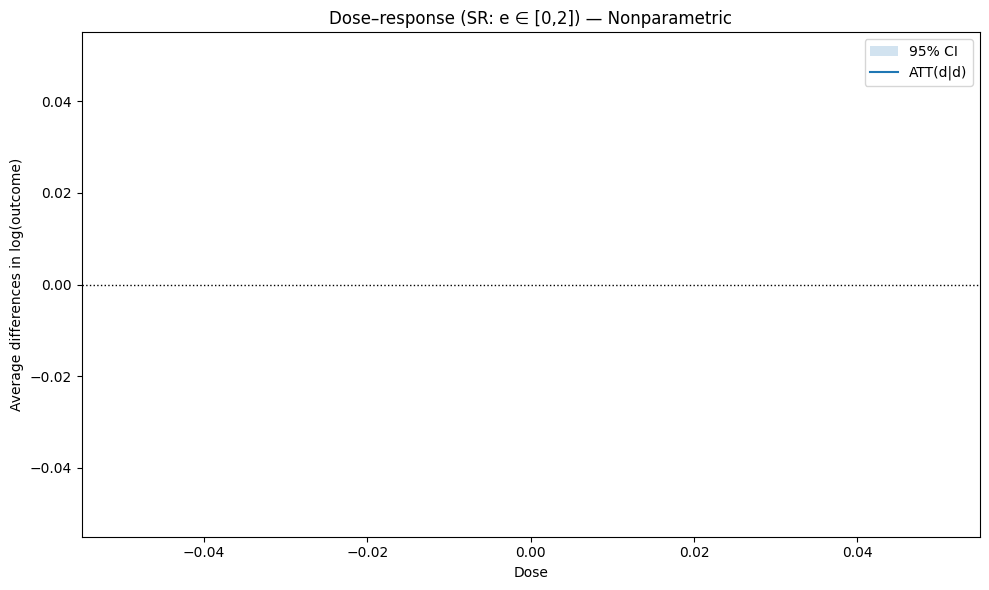

C:\Users\danie\AppData\Local\Temp\ipykernel_12748\1321913682.py:260: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: d.loc[d["_nyt_t"], "dY"].mean())


[LR] time-averaged sample:
  n = 308 ; d-range = [0.20, 9.34] ; mean(d) = 4.04
  after central_support (2.0,6.0): n = 283
[LR] kept after trimming: 283 obs


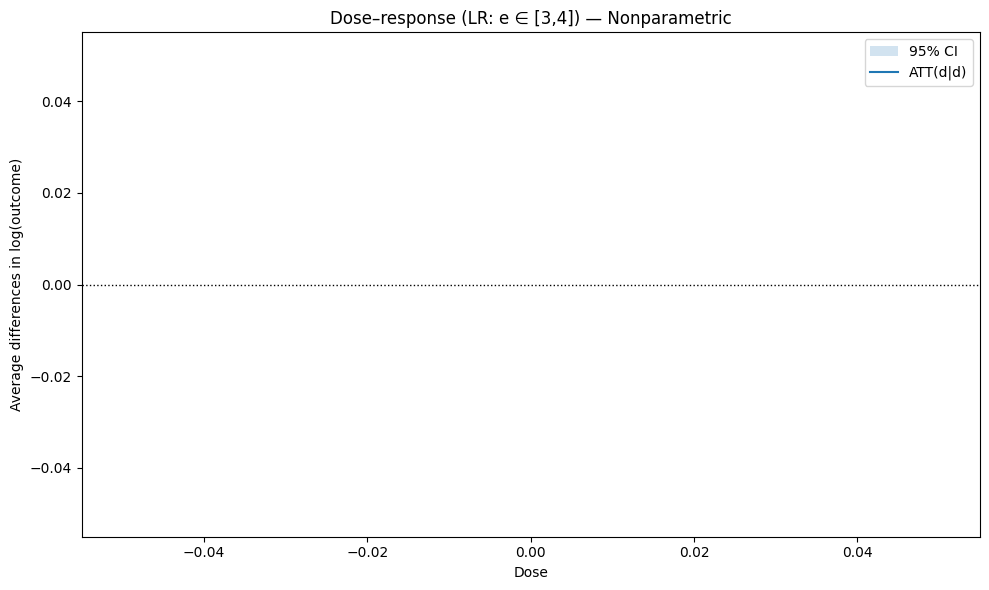

[ALL] time-averaged sample:
  n = 308 ; d-range = [0.20, 9.34] ; mean(d) = 4.04
  after central_support (2.0,6.0): n = 283
[ALL] kept after trimming: 283 obs


C:\Users\danie\AppData\Local\Temp\ipykernel_12748\1321913682.py:260: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: d.loc[d["_nyt_t"], "dY"].mean())


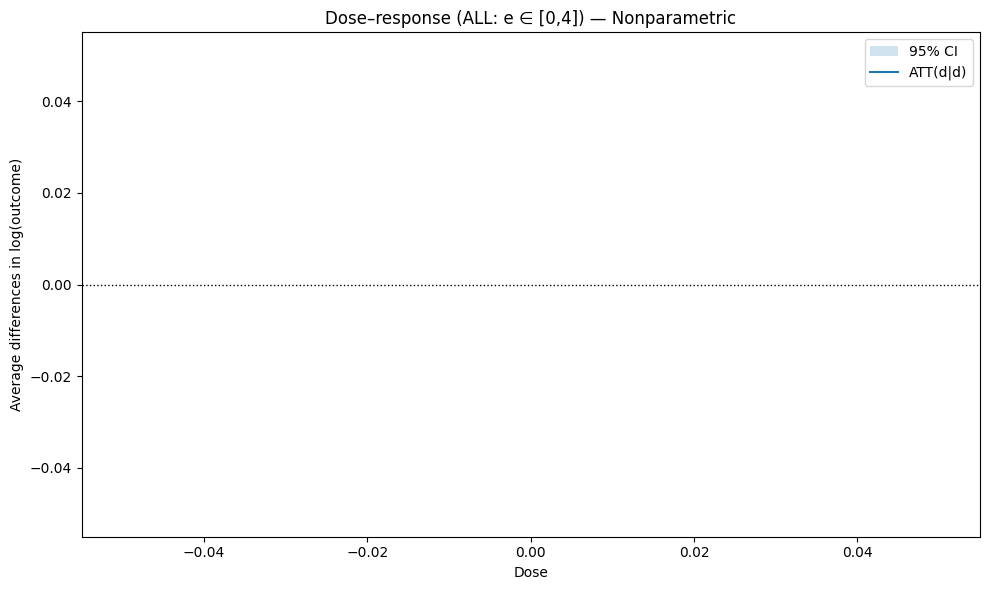

In [38]:
     # 2) Dose–response curves (choose model in header)
curves_np = run_dose_response_curves(
         df=data_bcgk,
         windows=WINDOWS_EDOSE,
         central_support=(2.0, 6.0),       # optional display trimming
         model_type=DOSE_RESPONSE_MODEL,   # "nonparametric" or "parametric"
         poly_degree=POLY_DEGREE
     )

In [39]:
curves_np["SR"], curves_np["LR"], curves_np["ALL"]

(        d  att  lci95  uci95
 0    2.01  NaN    NaN    NaN
 1    2.02  NaN    NaN    NaN
 2    2.17  NaN    NaN    NaN
 3    2.34  NaN    NaN    NaN
 4    2.34  NaN    NaN    NaN
 ..    ...  ...    ...    ...
 299  5.00  NaN    NaN    NaN
 300  5.00  NaN    NaN    NaN
 301  5.00  NaN    NaN    NaN
 302  5.00  NaN    NaN    NaN
 303  5.65  NaN    NaN    NaN
 
 [304 rows x 4 columns],
         d  att  lci95  uci95
 0    2.01  NaN    NaN    NaN
 1    2.02  NaN    NaN    NaN
 2    2.17  NaN    NaN    NaN
 3    2.34  NaN    NaN    NaN
 4    2.34  NaN    NaN    NaN
 ..    ...  ...    ...    ...
 278  5.00  NaN    NaN    NaN
 279  5.00  NaN    NaN    NaN
 280  5.00  NaN    NaN    NaN
 281  5.00  NaN    NaN    NaN
 282  5.65  NaN    NaN    NaN
 
 [283 rows x 4 columns],
         d  att  lci95  uci95
 0    2.01  NaN    NaN    NaN
 1    2.02  NaN    NaN    NaN
 2    2.17  NaN    NaN    NaN
 3    2.34  NaN    NaN    NaN
 4    2.34  NaN    NaN    NaN
 ..    ...  ...    ...    ...
 278  5.00  NaN 

In [34]:
es_tables["overall"], es_tables["[0.2,3.95]"], es_tables["[3.96,9.35]"]

(    relative_period       ATT  std_error     lower     upper zero_not_in_cband
 0               -22  0.077850   0.054897 -0.029747  0.185447                  
 1               -21  0.068372   0.051407 -0.032383  0.169128                  
 2               -20 -0.091832   0.055809 -0.201215  0.017551                  
 3               -19 -0.077366   0.035396 -0.146741 -0.007991                 *
 4               -18  0.046232   0.020778  0.005508  0.086956                 *
 5               -17  0.043980   0.018411  0.007894  0.080065                 *
 6               -16  0.042538   0.017408  0.008419  0.076657                 *
 7               -15  0.048150   0.015408  0.017951  0.078349                 *
 8               -14  0.043456   0.014441  0.015152  0.071760                 *
 9               -13  0.041933   0.013914  0.014662  0.069204                 *
 10              -12  0.040167   0.013294  0.014110  0.066224                 *
 11              -11  0.011570   0.01238

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 293.19it/s]


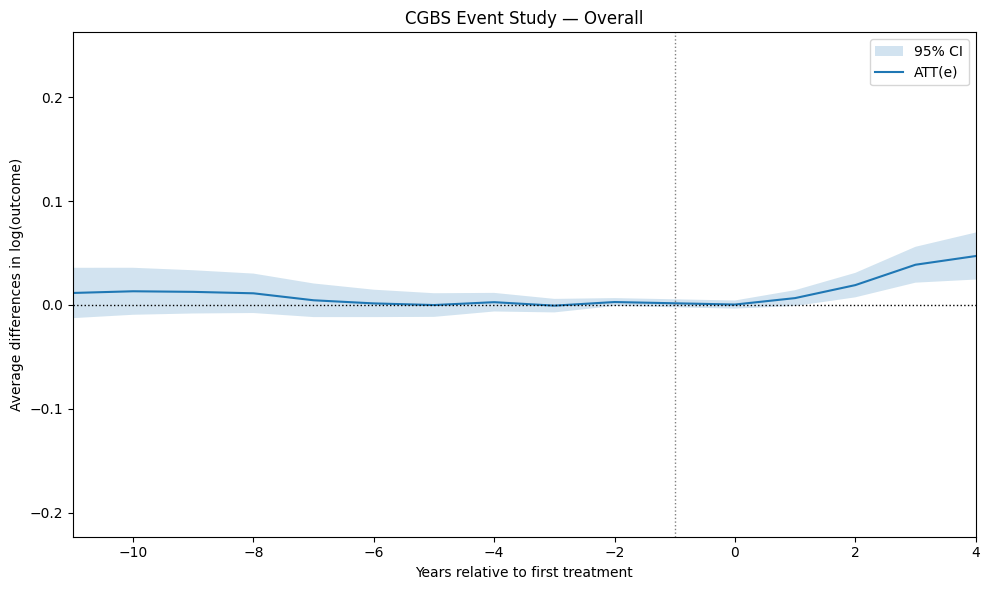

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 318.99it/s]


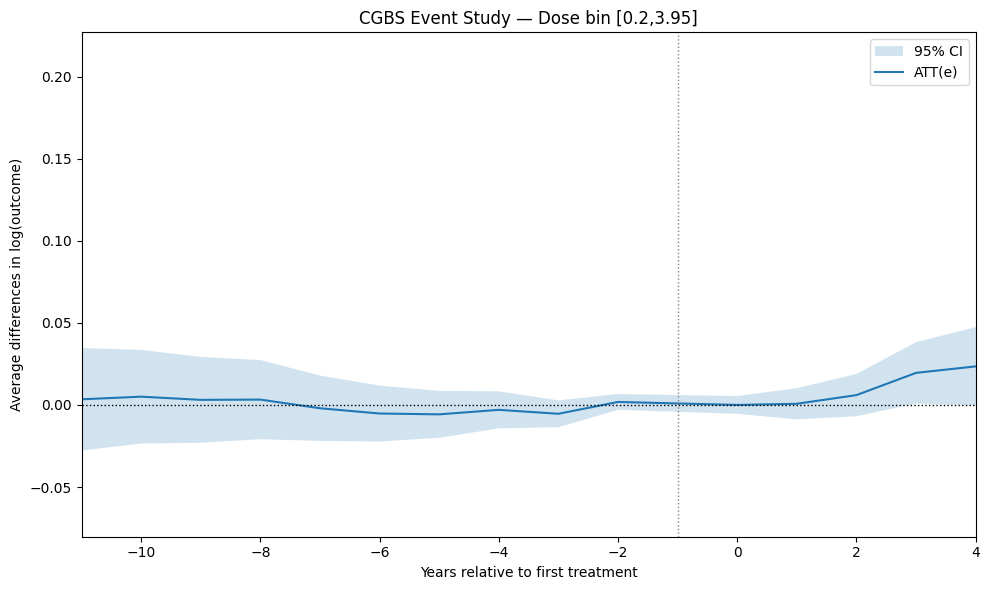

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\differences\tools\panel_validation.py:379: UserWarning: 73 entity-events ignored because the event (cohort) date
 is after the end of the panel for the specific entity, as if never treated
  warn(
Computing ATTgt [workers=1]   100%|████████████████████| 200/200 [00:00<00:00, 351.43it/s]


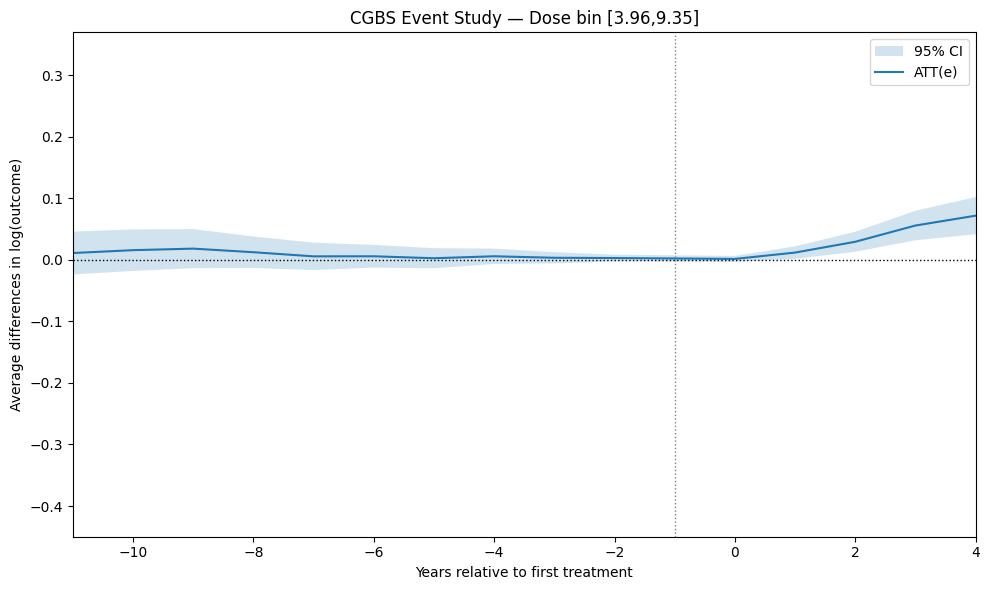

In [37]:
es_tables = run_event_studies(
         df=data_bcgk,
         control_group="not_yet",          # or "never"
         dose_bins=[DOSE_BIN_LOW, DOSE_BIN_HIGH],
         title_prefix="CGBS Event Study"
     )

In [28]:
# ============================================================
# Continuous DiD (CGBS, 2024) — Generic, parameterized pipeline
# Event-studies (overall / dose-bins) + Time-averaged dose–response curves
# Dependencies: pandas, numpy, patsy, statsmodels, matplotlib, differences
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix
from scipy.linalg import pinv
from typing import Tuple, List, Dict, Optional
from differences import ATTgt

# ----------------------
# ===== PARAMETERS =====
# ----------------------
# Column names in your dataset
COL_ID    = "i"        # unit id
COL_TIME  = "t"        # time (int)
COL_OUT   = "y"        # outcome
COL_DOSE  = "d"        # continuous dose (treatment intensity at first treatment)
COL_G     = "G"        # first treatment time (np.inf for never-treated; can be set below)

# Event-study plotting defaults
REF_PERIOD            = -1           # reference period (baseline)
X_WINDOW: Optional[Tuple[int,int]] = (-11, 4)  # x-axis window for ES plots
CONTROL_GROUP         = "not_yet"    # "not_yet" (recommended) or "never"
SHOW_REF_POINT        = False        # if False, drop the plotted point at REF_PERIOD
SHOW_ATT_HLINE        = False        # horizontal line at overall ATT (optional aesthetic)

# Dose bins (for ATT_es^{[d1,d2]}(e) via subsetting)
# Example: below/above treated-median; you may set them programmatically from the data.
DOSE_BIN_LOW  = (0.20, 3.95)  # [d1, d2], inclusive on both ends
DOSE_BIN_HIGH = (3.96, 9.35)

# Time-averaged dose–response windows (SR/LR/All)
WINDOWS_EDOSE: Dict[str, Tuple[int,int]] = {
    "SR": (0, 2),
    "LR": (3, 4),
    "ALL": (0, 4),
}

# Spline settings
SPLINE_DEGREE = 3
SPLINE_QKNOTS = (0.25, 0.50, 0.75)  # internal knots at these quantiles of dose among treated
CLUSTER_COL   = COL_ID

# --------------------------------
# ===== PREP & SANITY HELPERS =====
# --------------------------------

def prepare_panel(df: pd.DataFrame) -> pd.DataFrame:
    """
    Ensure column types, create 'never-treated' convention G=inf for dose==0,
    and compute relative event-time.
    """
    df = df.copy()
    # Coerce time to int, id to category if helpful
    df[COL_TIME] = pd.to_numeric(df[COL_TIME], errors="coerce").astype(int)
    # If never-treated encoding isn't set, set G=inf where dose==0
    if COL_G not in df.columns:
        raise ValueError(f"Column '{COL_G}' not found. Please provide first-treatment time per unit.")
    df[COL_G] = pd.to_numeric(df[COL_G], errors="coerce")
    df.loc[df[COL_DOSE].fillna(0) == 0, COL_G] = np.inf

    # Relative event-time (only defined for ever-treated units)
    df["event_time"] = np.where(np.isfinite(df[COL_G]), df[COL_TIME] - df[COL_G], np.nan)
    return df


def subset_by_dose_bin(df: pd.DataFrame, d1: float, d2: float) -> pd.DataFrame:
    """
    Keep units with dose in [d1,d2] or never-treated (dose==0 -> G=inf). This is the identification set
    for ATT_es^{[d1,d2]}(e) where within this subset we can ignore intensity.
    """
    df = df.copy()
    mask_bin = ((df[COL_DOSE] >= d1) & (df[COL_DOSE] <= d2)) | (df[COL_DOSE] == 0)
    sub = df.loc[mask_bin].copy()
    # Ensure G=inf for never-treated within the subset
    sub.loc[sub[COL_DOSE] == 0, COL_G] = np.inf
    return sub


def _attgt_eventstudy(
    df: pd.DataFrame,
    control_group: str = "not_yet",
    base_period: str = "universal"
) -> pd.DataFrame:
    """
    Run ATTgt event-study on (possibly subset) panel using differences. 
    Returns tidy event-study table with columns: relative_period, ATT, std_error, lower, upper, zero_not_in_cband
    """
    # Build panel index required by differences
    df = df.copy()
    df["i1"] = df[COL_ID].astype(int)
    df["t1"] = df[COL_TIME].astype(int)
    df = df.set_index(["i1", "t1"]).sort_index()

    # ATTgt with not-yet-treated or never-treated
    if control_group == "not_yet":
        cg = "not_yet_treated"
    elif control_group == "never":
        cg = "never_treated"
    else:
        raise ValueError("control_group must be 'not_yet' or 'never'.")

    att = ATTgt(data=df, cohort_name=COL_G, base_period=base_period)
    att.fit(formula=COL_OUT, control_group=cg, est_method="reg")

    es = att.aggregate(type_of_aggregation="event")
    es = es.reset_index()
    es["relative_period"] = pd.to_numeric(es["relative_period"], errors="coerce")
    # Drop the header-like first two rows if present (differences returns meta rows at the top)
    if len(es) > 0 and es.iloc[:2, :].isna().any(axis=None):
        es = es.iloc[2:].reset_index(drop=True)

    es.columns = ["relative_period", "ATT", "std_error", "lower", "upper", "zero_not_in_cband"]
    # Force the REF point to 0 for plotting comparability if requested later
    es.loc[es["relative_period"] == REF_PERIOD, ["ATT", "lower", "upper"]] = 0.0
    return es


def plot_event_study(es: pd.DataFrame, title: str, color: str = "C0"):
    """
    Clean event-study plot with CI band. 
    """
    es = es.sort_values("relative_period").copy()
    plt.figure(figsize=(10, 6))
    plt.fill_between(es["relative_period"], es["lower"], es["upper"], alpha=0.2, label="95% CI")
    plt.plot(es["relative_period"], es["ATT"], linewidth=1.5, label="ATT(e)")
    # Axes and refs
    if X_WINDOW is not None:
        plt.xlim(*X_WINDOW)
    plt.axvline(REF_PERIOD, color='grey', linestyle="dotted", linewidth=1)
    plt.axhline(0, color="black", linestyle="dotted", linewidth=1)
    plt.xlabel("Years relative to first treatment")
    plt.ylabel("Average differences in log(outcome)")
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# ----------------------------------------------------
# ===== TIME-AVERAGED DOSE–RESPONSE CONSTRUCTION =====
# ----------------------------------------------------

def build_time_averaged_panel(
    df: pd.DataFrame, e1: int, e2: int
) -> pd.DataFrame:
    """
    Construct the time-averaged panel to estimate ATT_es^{[e1,e2]}(d).
    Steps:
      1) For each timing group g, keep units with G + e2 in [minT, maxT] (balanced window).
      2) For each i,t: dY = Y_t - Y_{g-1}.
      3) For each t: compute mean dY among not-yet-treated units at t (NYT at g+e2), then ddY = dY - mean_dY_NYT(t).
      4) Keep treated units exactly in event-time window e in [e1, e2], average over e for each i (i.e., per treated unit).
      5) Return a cross-section with columns: i, g, d (dose), ddY_bar (time-averaged across e).
    """
    df = df.copy()
    # Basic ranges
    tmin, tmax = df[COL_TIME].min(), df[COL_TIME].max()

    # Keep groups observed through G+e2 (balanced event-time window)
    ok_groups = df.loc[np.isfinite(df[COL_G]), [COL_ID, COL_G]].drop_duplicates()
    ok_groups = ok_groups.loc[(ok_groups[COL_G] + e2 <= tmax)]
    keep_ids = set(ok_groups[COL_ID].unique())

    work = df.loc[df[COL_ID].isin(keep_ids)].copy()

    # Pre-period per unit = g - 1
    work["pre_period"] = work[COL_G] - 1
    # Keep only rows with t in [g-1, g+e2]
    work = work[(work[COL_TIME] >= work["pre_period"]) & (work[COL_TIME] <= (work[COL_G] + e2))].copy()

    # Compute Y_{g-1} per unit i
    pre_vals = work.loc[work[COL_TIME] == work["pre_period"], [COL_ID, COL_OUT]].rename(columns={COL_OUT: "_y_pre"})
    work = work.merge(pre_vals, on=COL_ID, how="left")

    # dY = Y_t - Y_{g-1}
    work["dY"] = work[COL_OUT] - work["_y_pre"]

    # event-time e = t - g
    work["e"] = work[COL_TIME] - work[COL_G]

    # For each t, compute mean dY among NYT (G > t) OR never-treated (G=inf)
    # Indicator NYT at t: 1{G > t} U 1{dose==0}
    work["_nyt_t"] = ((work[COL_G] > work[COL_TIME]) | ~np.isfinite(work[COL_G])) | (work[COL_DOSE] == 0)
    mean_dY_t = (
        work.groupby(COL_TIME)
            .apply(lambda d: d.loc[d["_nyt_t"], "dY"].mean())
            .rename("_mean_dY_NYT")
            .reset_index()
    )
    work = work.merge(mean_dY_t, on=COL_TIME, how="left")

    # ddY = dY - mean_dY_NYT(t)
    work["ddY"] = work["dY"] - work["_mean_dY_NYT"]

    # Keep only treated observations and e in [e1, e2]
    treated = work.loc[np.isfinite(work[COL_G]) & (work[COL_DOSE] > 0)].copy()
    treated = treated[(treated["e"] >= e1) & (treated["e"] <= e2)].copy()

    # Average across e for each (i,g,d)
    avg = (
        treated.groupby([COL_ID, COL_G, COL_DOSE], as_index=False)["ddY"].mean()
              .rename(columns={"ddY": "ddY_bar", COL_G: "G_cs"})
    )
    return avg  # columns: i, G_cs, d, ddY_bar


def fit_cubic_spline_ddY(
    data: pd.DataFrame,
    dose_col: str = COL_DOSE,
    y_col: str = "ddY_bar",
    cluster_col: str = CLUSTER_COL,
    degree: int = SPLINE_DEGREE,
    qknots: Tuple[float, float, float] = SPLINE_QKNOTS
):
    """
    Fit cubic B-splines for the dose–response curve with cluster-robust SEs.
    Returns (results, spline_design) where results is a statsmodels regression result.
    """
    d = data.copy()
    # Internal knots at quantiles among treated doses in this sample
    knots = np.quantile(d[dose_col], qknots)
    spline_terms = dmatrix(
        f"bs({dose_col}, knots=({knots[0]}, {knots[1]}, {knots[2]}), degree={degree}, include_intercept=True) - 1",
        d, return_type="dataframe"
    )
    # OLS with cluster-robust SE
    model = sm.OLS(d[y_col].to_numpy(), spline_terms.to_numpy())
    results = model.fit(cov_type="cluster", cov_kwds={"groups": d[cluster_col]})
    return results, spline_terms


def influence_se_for_curve(
    results: sm.regression.linear_model.RegressionResultsWrapper,
    spline_design: pd.DataFrame
) -> np.ndarray:
    """
    Influence-function based standard errors for predictions on the training grid.
    """
    resid = results.resid.reshape(-1, 1)  # n x 1
    X = np.asarray(spline_design)         # n x p
    n = X.shape[0]
    # (X'X / n)^+ pseudoinverse
    ginv = pinv((X.T @ X) / n)
    infl_reg = resid * (X @ ginv)         # n x p
    # For fitted values at observed X: IF = infl_reg @ X'
    infl_att = infl_reg @ X.T             # n x n
    se = np.sqrt(np.mean(infl_att**2, axis=0) / n)  # length n (one SE per point)
    return se


def tidy_curve_with_ci(
    data: pd.DataFrame,
    results: sm.regression.linear_model.RegressionResultsWrapper,
    spline_design: pd.DataFrame,
    dose_col: str = COL_DOSE,
    y_col: str = "ddY_bar"
) -> pd.DataFrame:
    """
    Return tidy dataframe with columns: d, att_hat, lci95, uci95 (pointwise).
    """
    att_hat = results.predict()  # at observed design points (same order)
    se = influence_se_for_curve(results, spline_design)
    out = pd.DataFrame({
        "d": data[dose_col].to_numpy(),
        "att": att_hat,
        "lci95": att_hat - 1.96*se,
        "uci95": att_hat + 1.96*se
    })
    # Optional: keep central support to avoid extrapolation; user can also pass a mask upstream
    return out.sort_values("d").reset_index(drop=True)


def plot_dose_response(df_curve: pd.DataFrame, title: str):
    """
    Clean dose–response plot with CI band.
    """
    plt.figure(figsize=(10, 6))
    plt.fill_between(df_curve["d"], df_curve["lci95"], df_curve["uci95"], alpha=0.2, label="95% CI")
    plt.plot(df_curve["d"], df_curve["att"], linewidth=1.5, label="ATT(d|d)")
    plt.axhline(0, color="black", linestyle="dotted", linewidth=1)
    plt.xlabel("Dose")
    plt.ylabel("Average differences in log(outcome)")
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# ===== HIGH-LEVEL ORCHESTRATION API =====
# ----------------------------------------

def run_event_studies(
    df: pd.DataFrame,
    control_group: str = CONTROL_GROUP,
    dose_bins: Optional[List[Tuple[float, float]]] = None,
    title_prefix: str = "Event Study"
) -> Dict[str, pd.DataFrame]:
    """
    1) Overall ATT_es(e) (all doses, ever-treated + never / not-yet per control).
    2) ATT_es^{[d1,d2]}(e) for each dose bin via subsetting.
    Returns dict of named ES tables.
    """
    results = {}

    # Prepare once
    dfp = prepare_panel(df)

    # Overall ES (all doses): keep treated (d>0) and never-treated (d=0 -> G=inf)
    overall = dfp.copy()
    overall.loc[overall[COL_DOSE] == 0, COL_G] = np.inf
    es_all = _attgt_eventstudy(overall, control_group=control_group)
    results["overall"] = es_all
    plot_event_study(es_all, f"{title_prefix} – Overall")

    # Dose-bin ES
    if dose_bins:
        for (d1, d2) in dose_bins:
            sub = subset_by_dose_bin(dfp, d1, d2)
            es_bin = _attgt_eventstudy(sub, control_group=control_group)
            key = f"[{d1},{d2}]"
            results[key] = es_bin
            plot_event_study(es_bin, f"{title_prefix} – Dose bin {key}")

    return results


def run_dose_response_curves(
    df: pd.DataFrame,
    windows: Dict[str, Tuple[int,int]] = WINDOWS_EDOSE,
    central_support: Optional[Tuple[float, float]] = None,
) -> Dict[str, pd.DataFrame]:
    """
    For each time window (e1,e2), build the time-averaged panel and fit cubic spline with cluster-robust SEs.
    Optionally restrict plotting to a central support of dose (e.g., (2.0, 6.0)) to reduce extrapolation.
    Returns dict of tidy curve dfs with columns d, att, lci95, uci95.
    """
    dfp = prepare_panel(df)
    out = {}
    for tag, (e1,e2) in windows.items():
        avg = build_time_averaged_panel(dfp, e1, e2)
        if central_support is not None:
            lo, hi = central_support
            avg = avg[(avg[COL_DOSE] > lo) & (avg[COL_DOSE] < hi)].copy()
        # Fit spline and tidy
        res, Xs = fit_cubic_spline_ddY(avg, dose_col=COL_DOSE, y_col="ddY_bar", cluster_col=COL_ID)
        curve = tidy_curve_with_ci(avg, res, Xs, dose_col=COL_DOSE, y_col="ddY_bar")
        out[tag] = curve
        plot_dose_response(curve, f"Dose–response ({tag}: e ∈ [{e1},{e2}])")
    return out

# -------------------------------
# ====== EXAMPLE — HOW TO USE ===
# -------------------------------
# # Load data (as in your replication)
# data_bcgk = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bcgk_replication.dta")
# # Optional: exclude 2015 if needed to match the paper
# data_bcgk = data_bcgk.loc[data_bcgk[COL_TIME] != 2015].copy()
#
# # 1) Event-studies: overall + bins
# es_dict = run_event_studies(
#     df=data_bcgk,
#     control_group="not_yet",                          # or "never"
#     dose_bins=[DOSE_BIN_LOW, DOSE_BIN_HIGH],
#     title_prefix="CGBS Event Study"
# )
#
# # 2) Dose–response curves in SR/LR/ALL windows
# curves = run_dose_response_curves(
#     df=data_bcgk,
#     windows=WINDOWS_EDOSE,
#     central_support=(2.0, 6.0)                        # optional trimming for display
# )
#
# # es_dict["overall"], es_dict["[0.2,3.95]"], es_dict["[3.96,9.35]"] are tidy dataframes ready to export.
# # curves["SR"], curves["LR"], curves["ALL"] are tidy dataframes ready to export.
